---
# Data Analysis
---
In this notebook, it is the data analysis section.

1. We will be looking at the data distribution for all clients, the ones who left and remained, to see which column could be the best predictors.
2. We will be looking at the data distribution of the clients who left, to see if there is a column that could be a better predictors to predict if a clients will be leaving.


---
## Results
---

**Distribution of Churn Value**
  - The distribution of Churn Value is unbalanced.
  - Therefore, we will need to inversely weight each possible outcome of the model accordingly.

**Distribution of Churn Reason**

  - The three most important reasons that the clients left were:
       1. Dissactifaction (42%)
       2. Competitors (33%)
       3. Price (13%)

  - It is important to investigate

**Distribution of Gender by Churn Value**
  - No difference in the gender distribution of the remaining clients vs the ones who left.
  - In other words, sex is NOT going to be a good predictors.


**Distribution of Senior Citizen by Churn Value**
  - The distribution of Senior Citizen is very different in the remaining clients than in the clients who keft.
  - The Senior Citizen represents a larger part of the churn population than in the remaining population.
  - Thus, Senior Citizen is going to be a good predictors.

**Distribution of Partner by Churn Value**
  - People without a partner are more likely to leave.
  - Thus, Partner is going to be a good predictors.
    
**Distribution of Dependent by Churn Value**
  - People with dependent are less likely to leave.
  - Thus, Dependent is going to be a good predictors.

**Distribution of Phone Service by Churn Value**
  - There is no major difference in distribution between the remaining population and the churn population.
  - Thus, the Phone Service is NOT a good predictor.

**Distribution of Internet Service by Churn Value**
  - People with Internet Fiber Service are more likely to leave.
  - Thus, the Internet Service is a good predictor.

**Distribution of Online Security by Churn Value**
  - People with No Online Security Service are more likely to leave.
  - Thus, the Online Security is a good predictor.

**Distribution of Online Backup by Churn Value**
  - People with No Online Backup Service are more likely to leave.
  - Thus, the Online Backup is a good predictor.

**Distribution of Device Protection by Churn Value**
  - People with no Device Protection Service are more likely to leave.
  - Thus, the Device Protection is a good predictor.

**Distribution of Tech Support Service by Churn Value**
  - People with No Tech Support Service are more likely to leave.
  - Thus, the Tech Support is a good predictor.

**Distribution of Streaming TV by Churn Value**
  - There is no major difference in distribution between the remaining population and the churn population.
  - Thus, the Streaming TV is NOT a good predictor.

**Distribution of Streaming Movies by Churn Value**
  - There is no major difference in distribution between the remaining population and the churn population.
  - Thus, the Streaming Movies is NOT a good predictor.

**Distribution of Contract by Churn Value**
  - People with a Month to Month contract are more likely to leave.
  - Thus, the Contract is a good predictor.

**Distribution of Paiement Method by Churn Value**
  - People with that pay their bills with Electronic Check are more likely to leave.
  - Thus, Paiment Method is a good predictor.

**Distribution of Tenure Months by Churn Value**
  - Clients that have been with the company for a shorter amount of time tends to leave more easily.
  - Thus, Tenure Months is a good predictor.

**Distribution of Montlhy Charges by Churn Value**
  -  With higher Montlhy Charges are more likely to leave.
  - Thus, Montlhy Charges is a good predictor.

---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


### Read data file

In [2]:
churn_df = pd.read_excel('../data/churn_cleaned.xlsx')
churn_df

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,1,86,3239,Competitors
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,Electronic check,70.70,1,67,2701,Moved
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1,86,5372,Moved
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1,84,5003,Moved
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,1,89,5340,Competitors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,...,No,No,Two year,Yes,Bank transfer (automatic),21.15,0,45,5306,Not applicable
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,0,59,2140,Not applicable
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,0,71,5560,Not applicable
7041,Angelus Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,0,59,2793,Not applicable


In [3]:
churn_df.columns

Index(['City', 'Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Reason'],
      dtype='object')

### Investigate distribution of 'Churn Value'

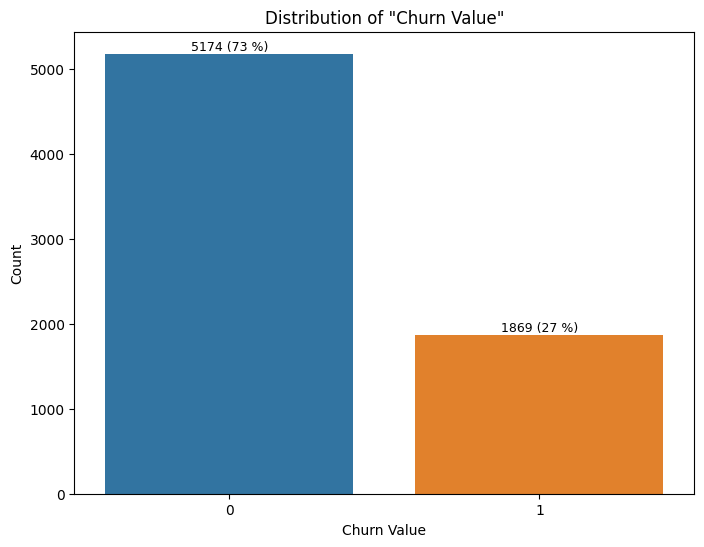

In [4]:
# Create figure and adjust size
plt.figure(figsize=(8,6))

# Create count plot
ax = sns.countplot(churn_df, x='Churn Value', hue='Churn Value', legend=False)

# Add title
ax.set_title('Distribution of "Churn Value"')

# Add axis labels
ax.set_xlabel('Churn Value')
ax.set_ylabel('Count')

# Add column labels
for index, artist in enumerate(ax.containers) :
    labels = [f'{v:.0f} ({(v/len(churn_df)) * 100:.0f} %)'  if v else '' for v in artist.datavalues]
    ax.bar_label(artist, labels=labels, fontsize = 9)

# Show plot
plt.show()

### Investigate the reasons that the clients left

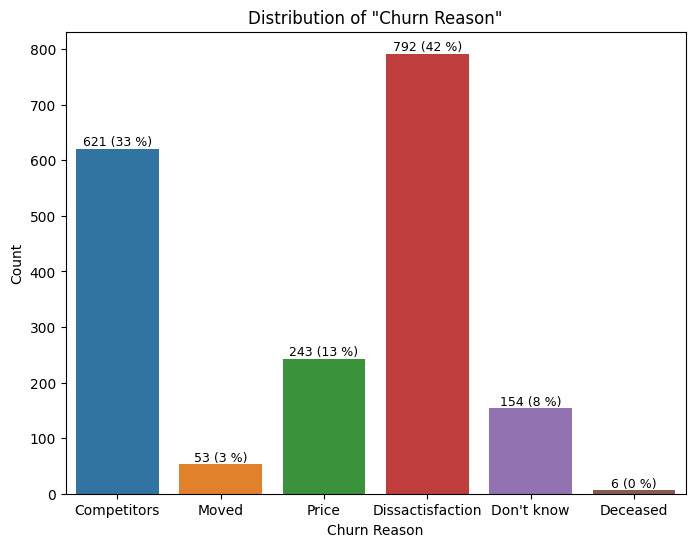

In [5]:
# Create figure and adjust size
plt.figure(figsize=(8,6))

# Create count plot
ax = sns.countplot(churn_df[churn_df['Churn Value'] == 1 ], x='Churn Reason', hue='Churn Reason', legend=False)

# Add title
ax.set_title('Distribution of "Churn Reason"')

# Add axis labels
ax.set_xlabel('Churn Reason')
ax.set_ylabel('Count')

# Add column labels
for index, artist in enumerate(ax.containers) :
    labels = [f'{v:.0f} ({(v/len(churn_df[churn_df['Churn Value'] == 1 ])) * 100:.0f} %)'  if v else '' for v in artist.datavalues]
    ax.bar_label(artist, labels=labels, fontsize = 9)

# Show plot
plt.show()

### Investigate the three main reasons of churning more in depth

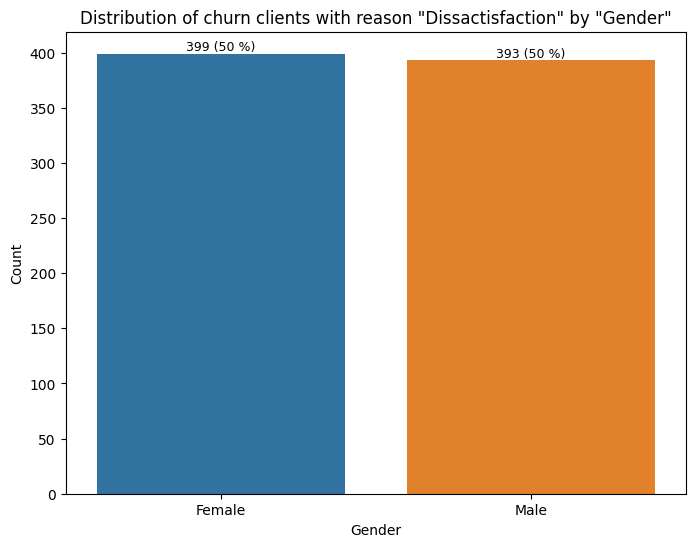

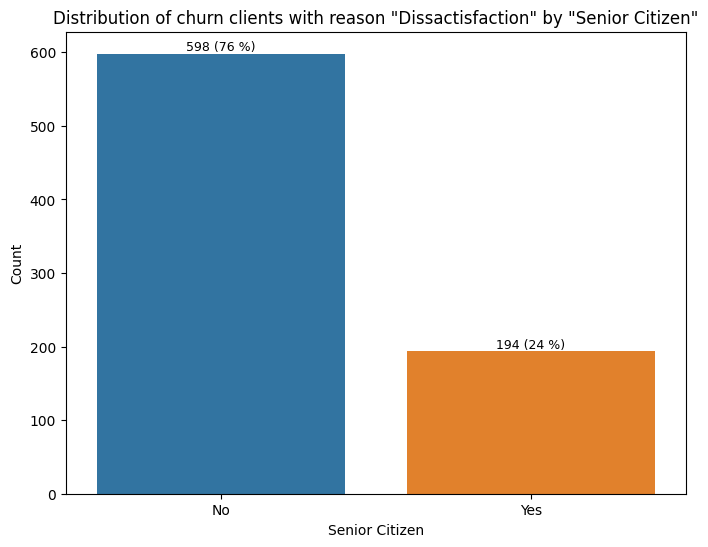

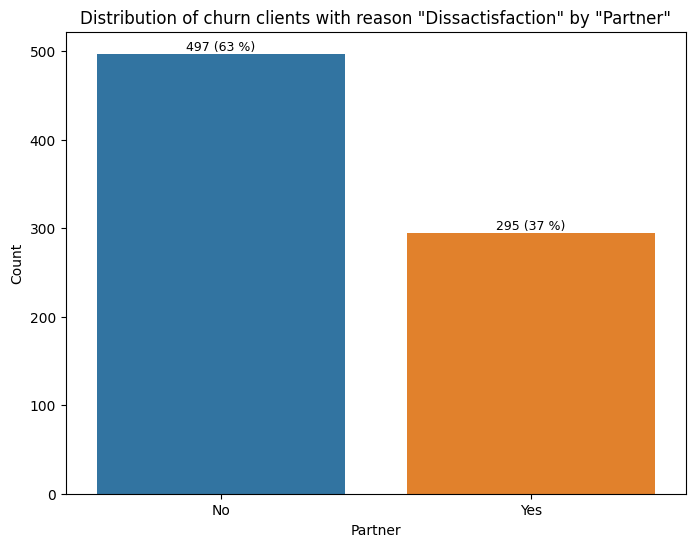

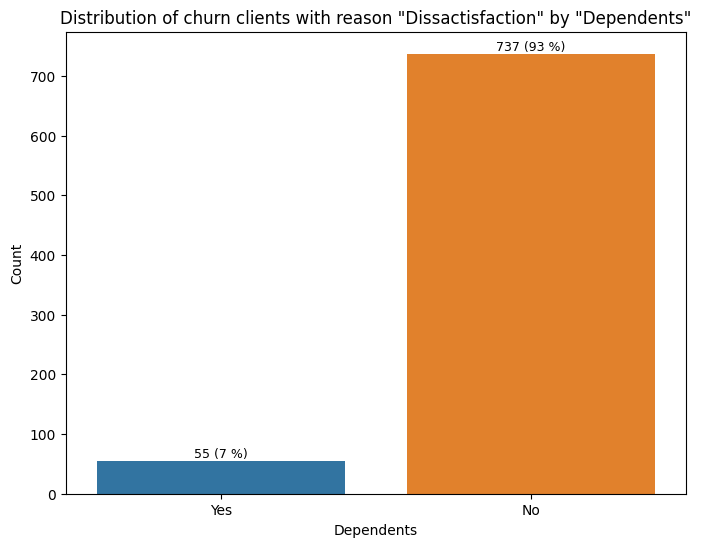

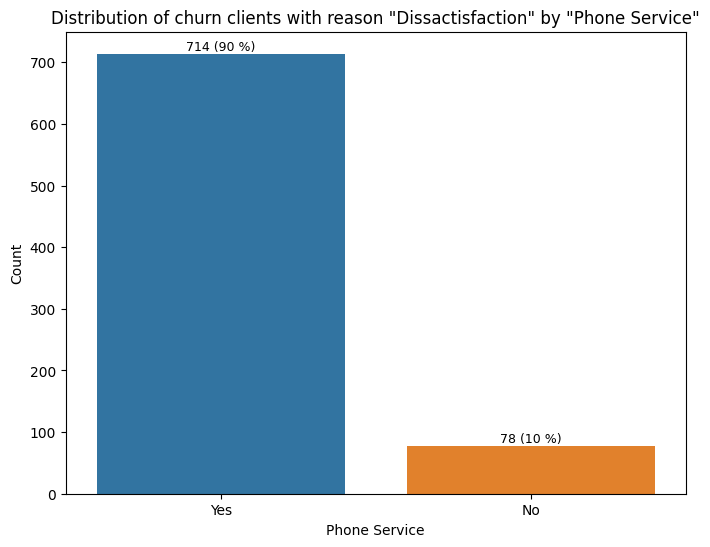

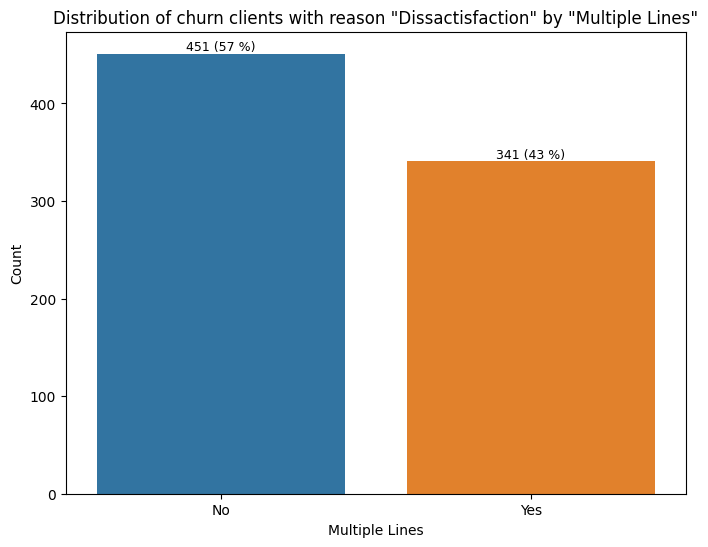

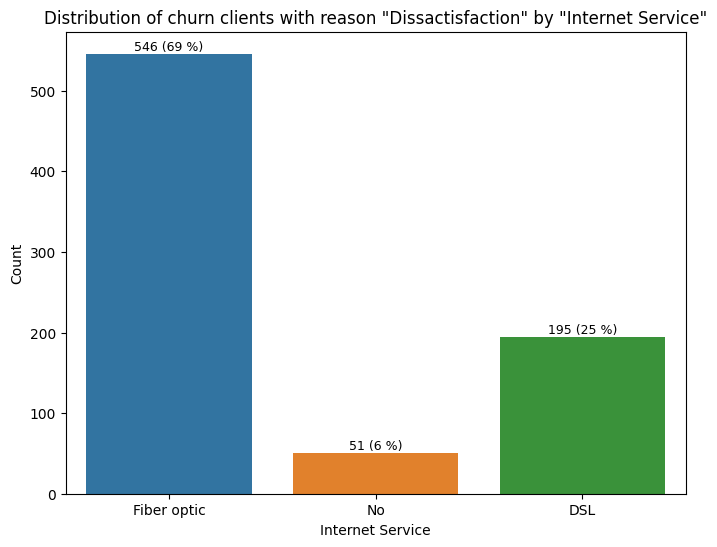

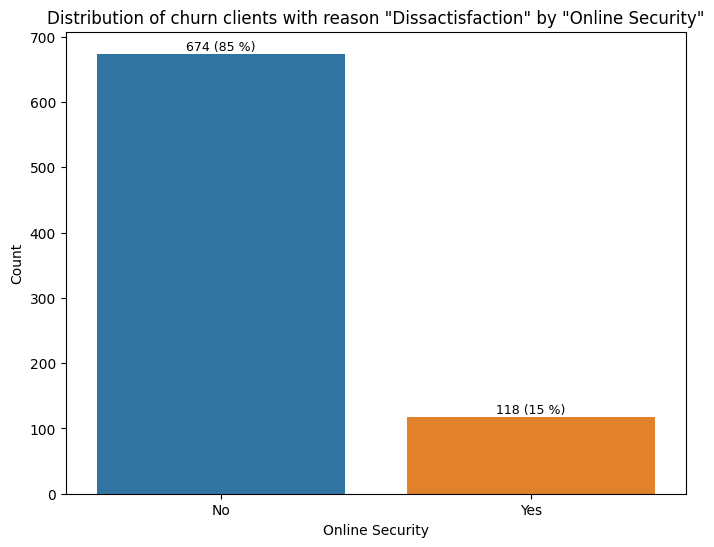

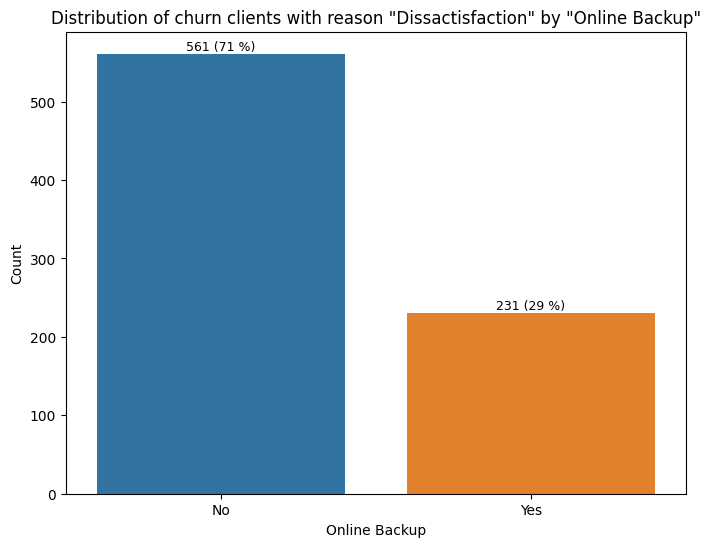

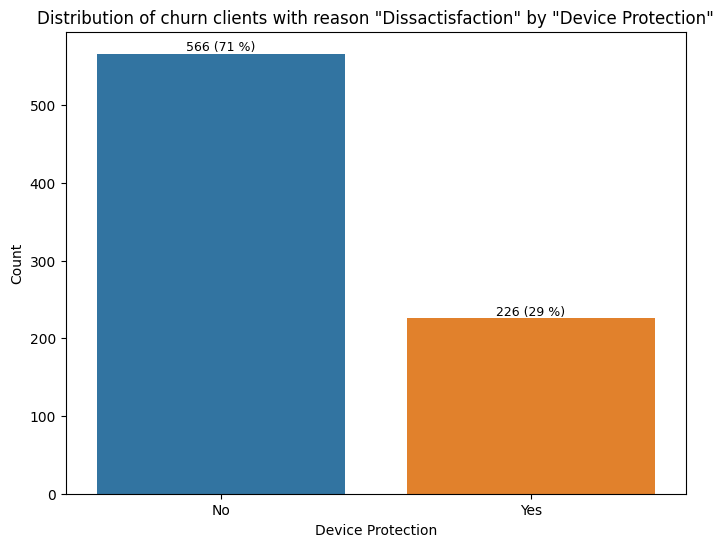

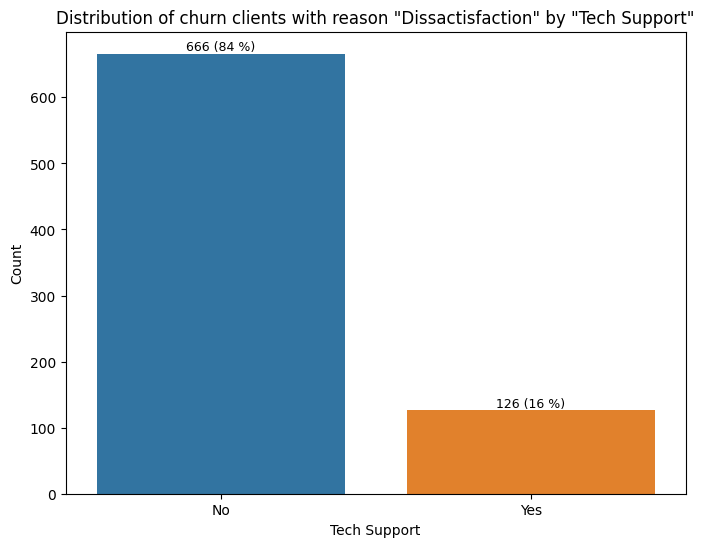

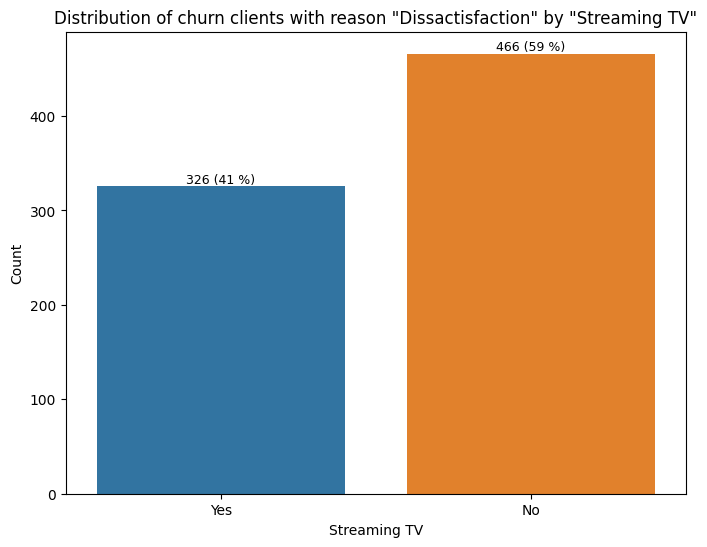

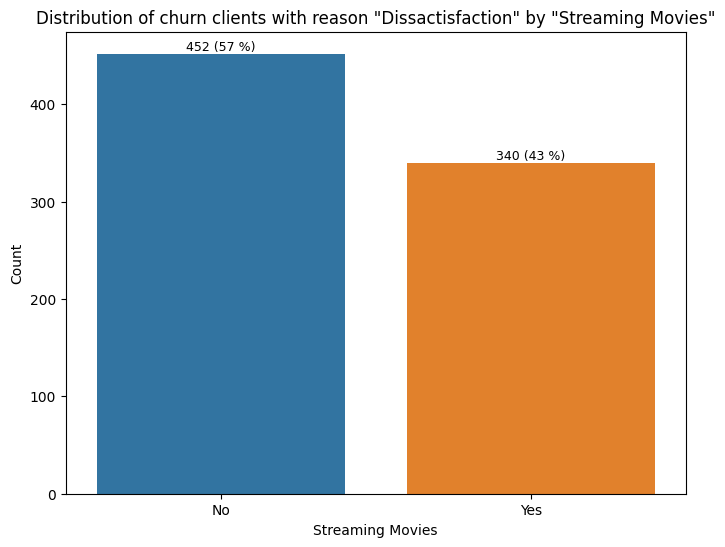

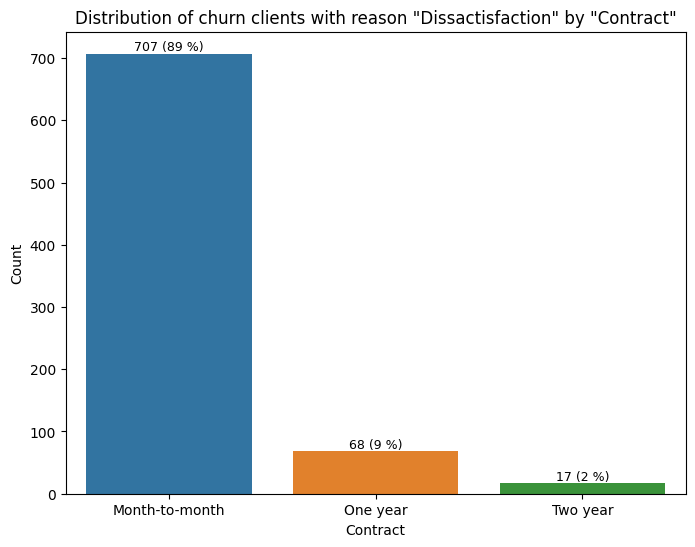

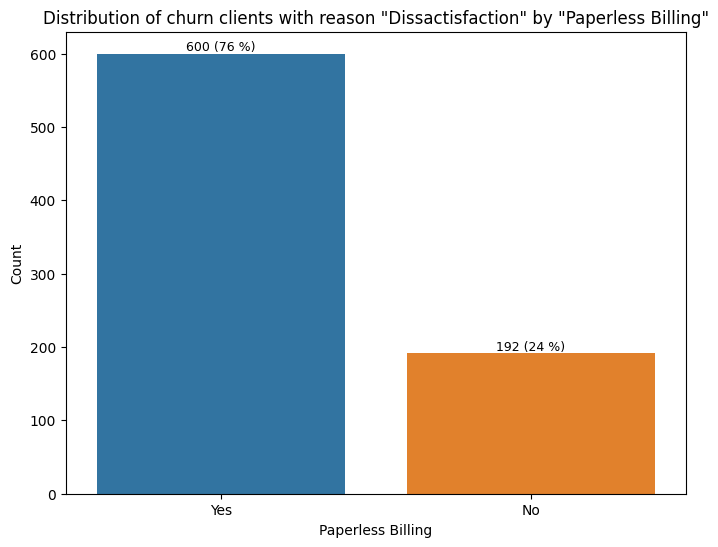

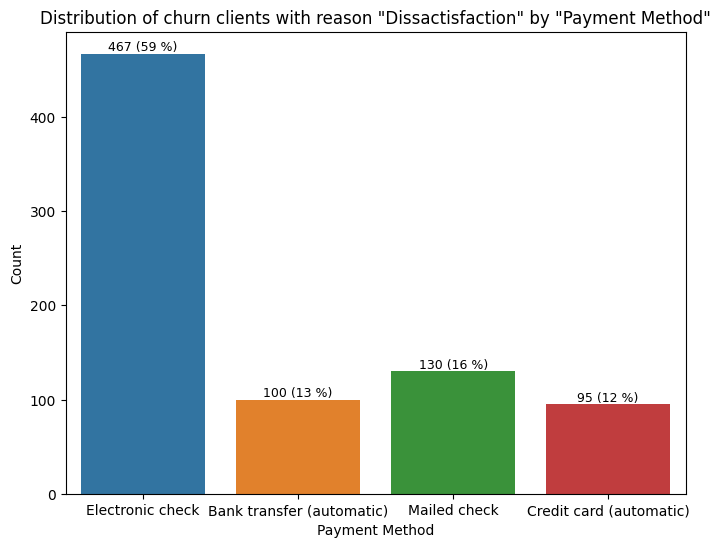

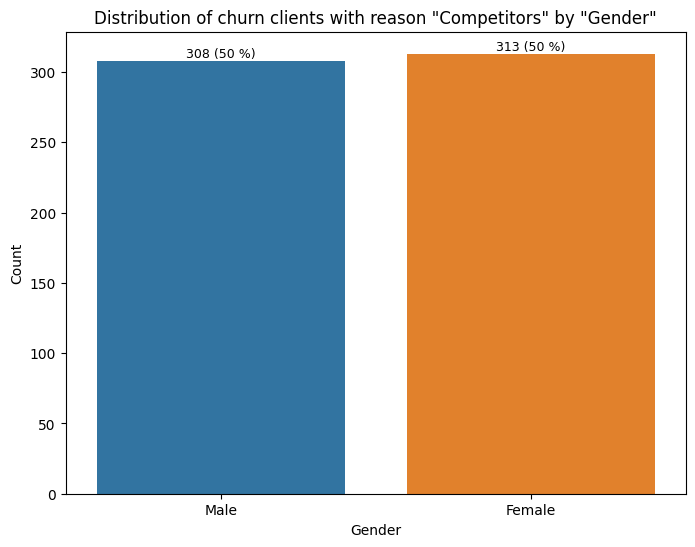

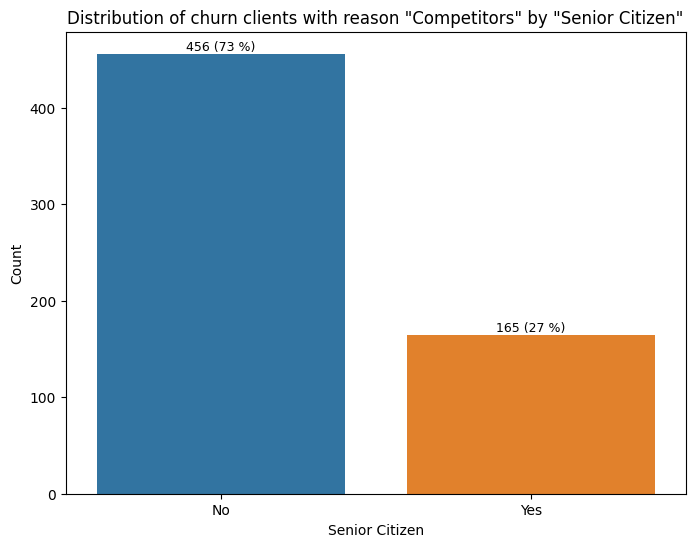

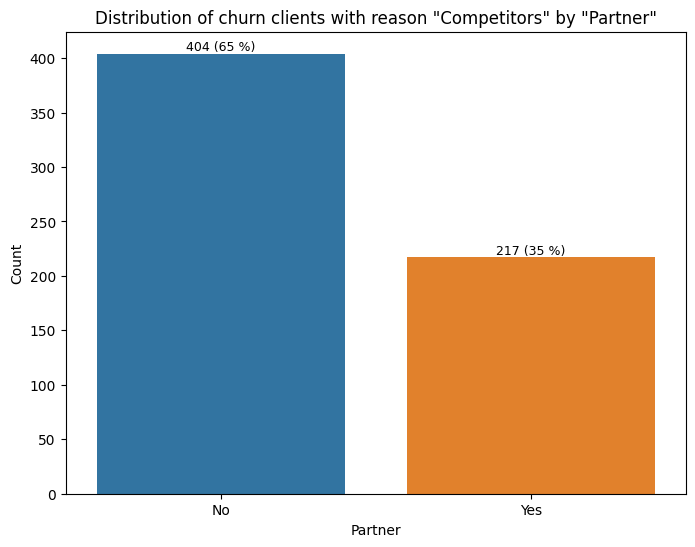

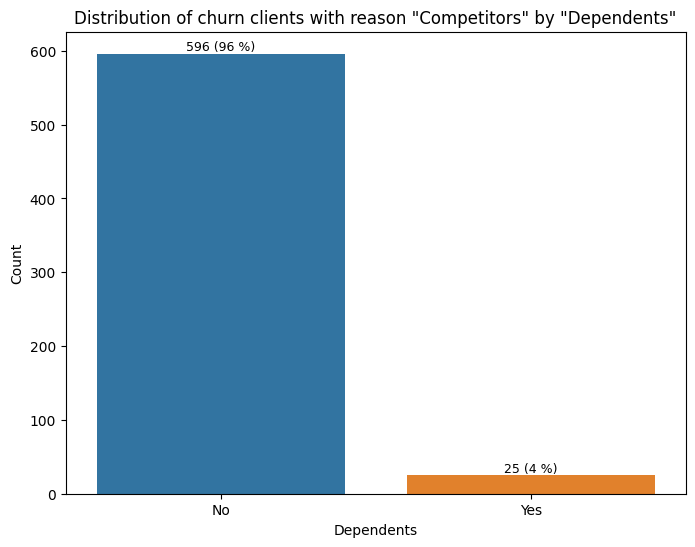

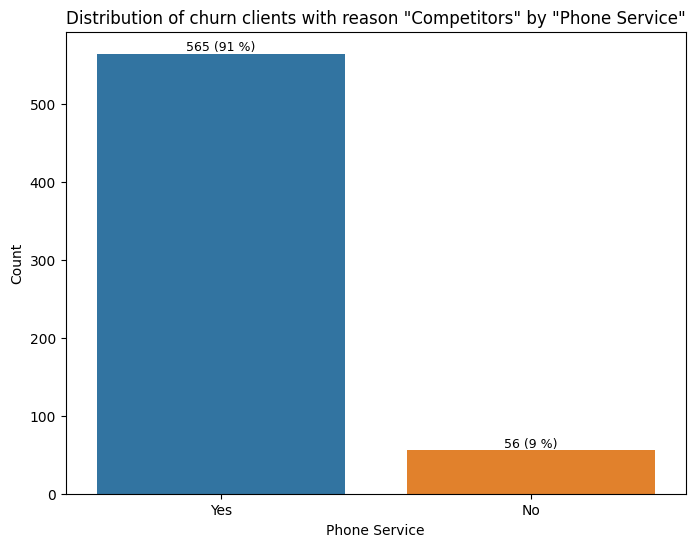

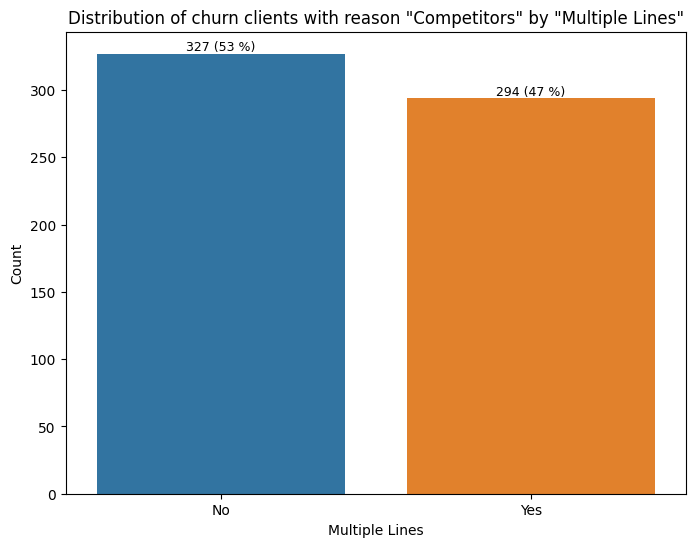

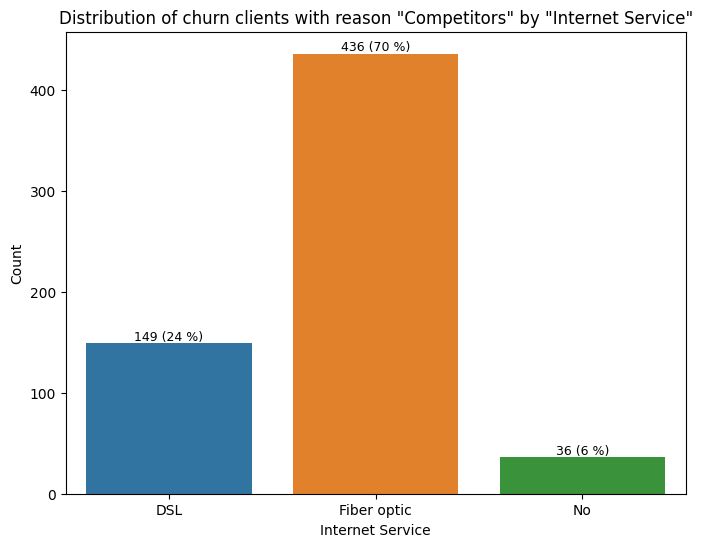

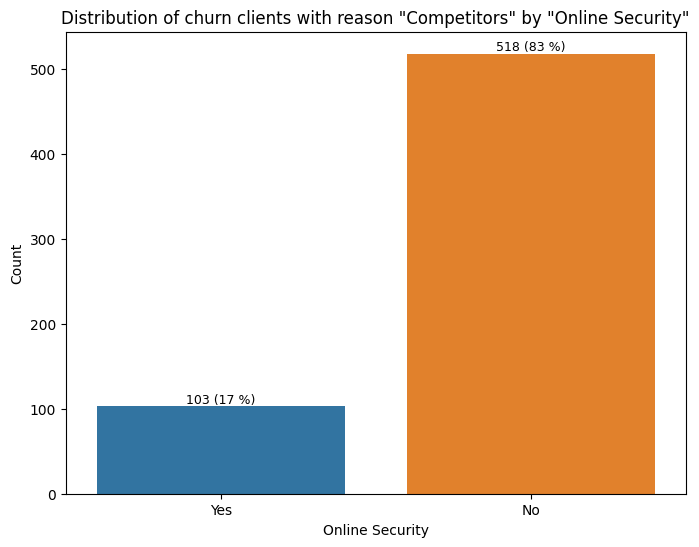

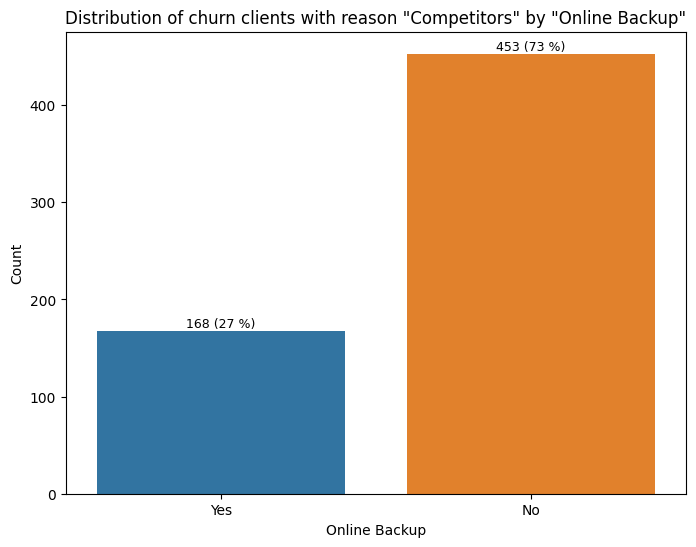

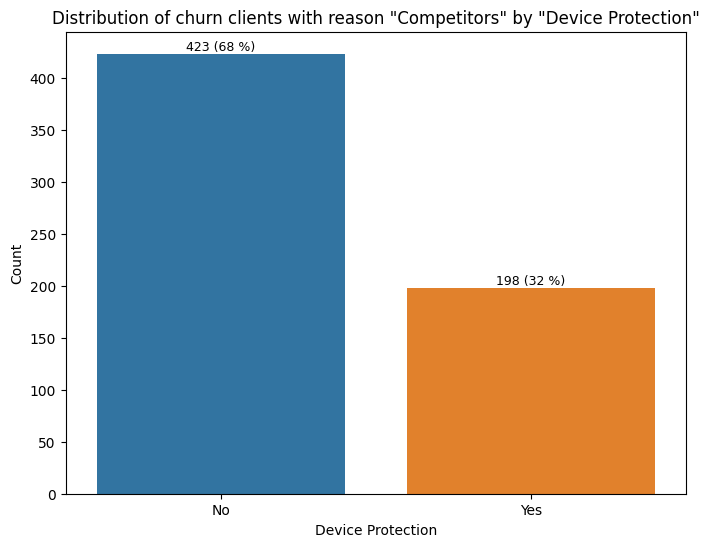

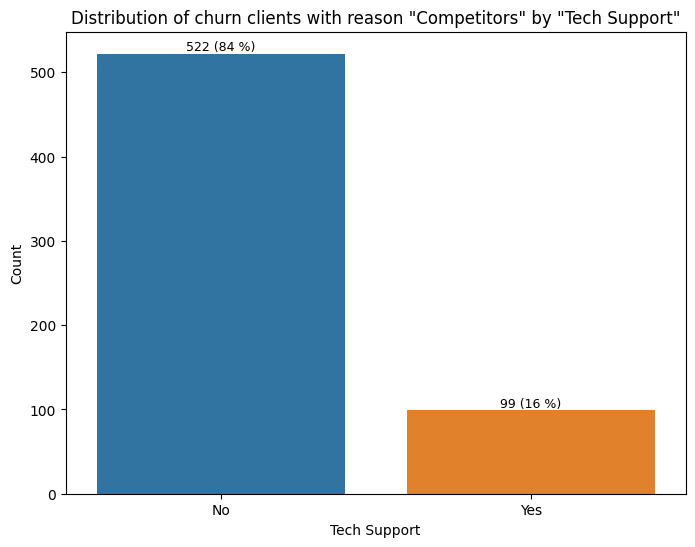

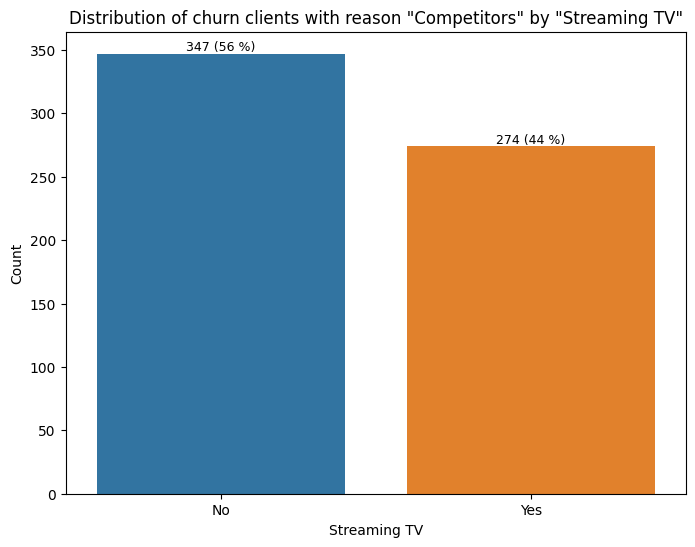

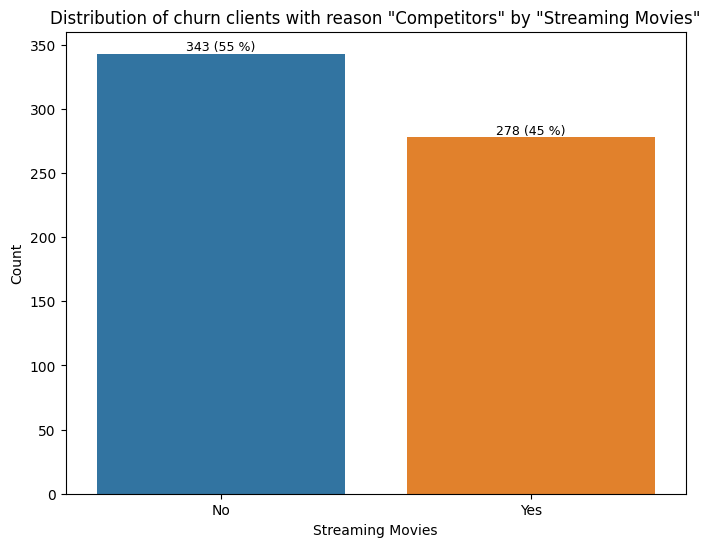

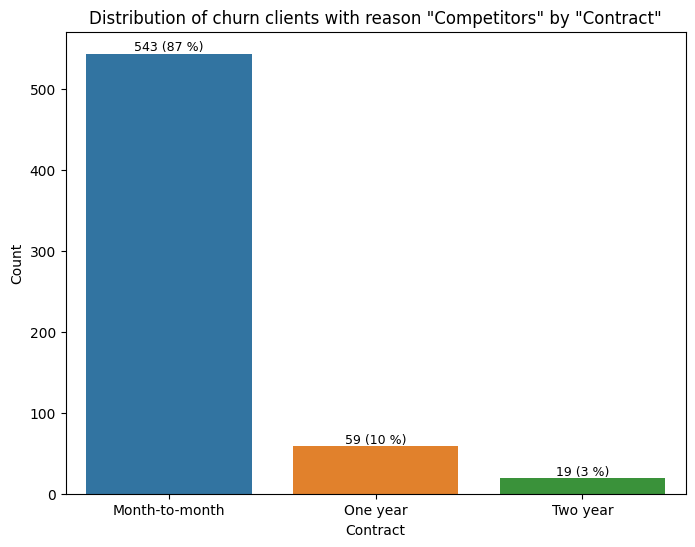

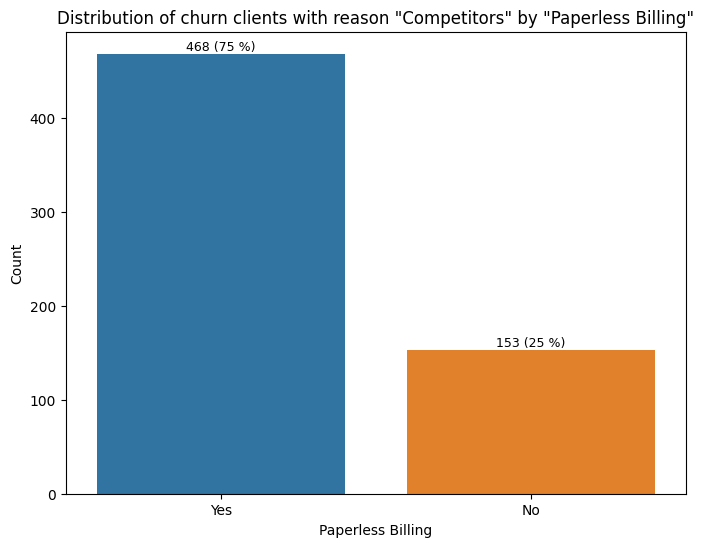

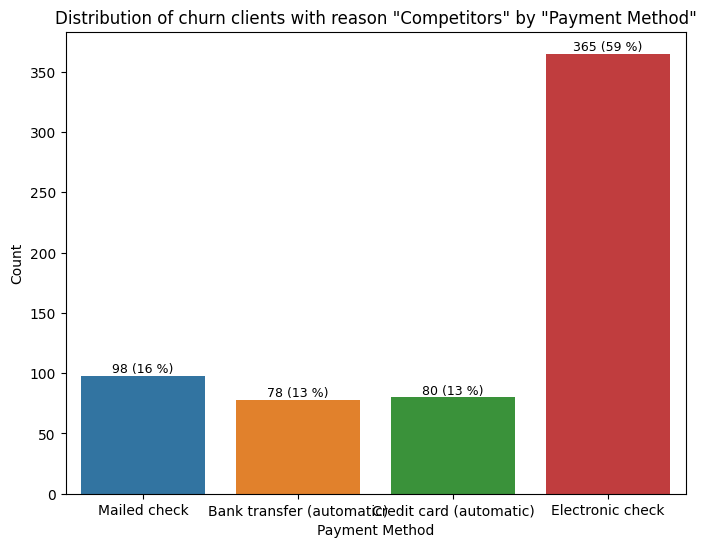

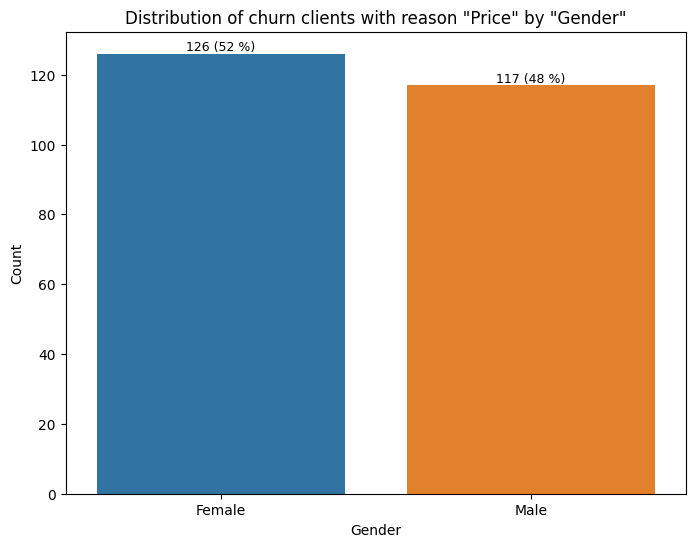

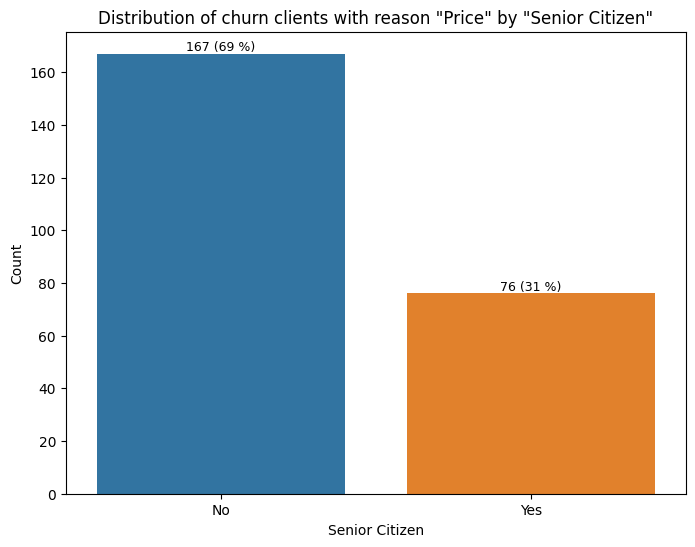

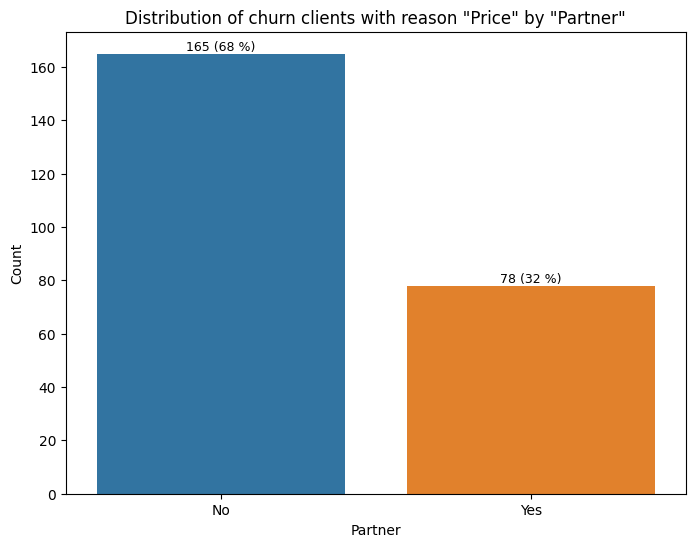

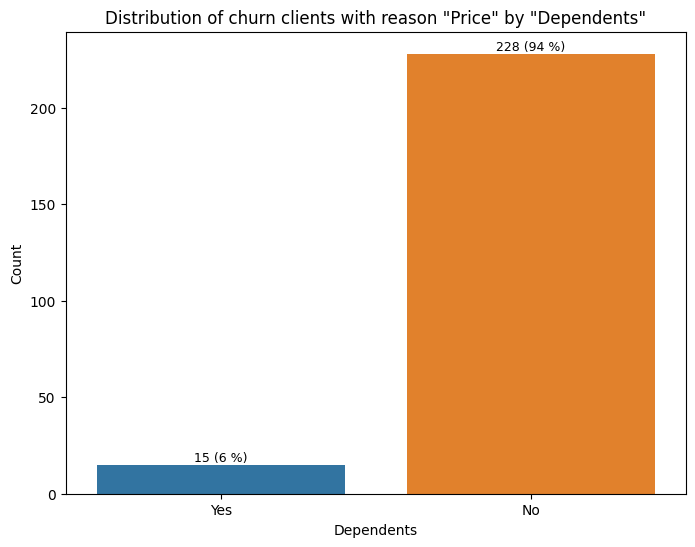

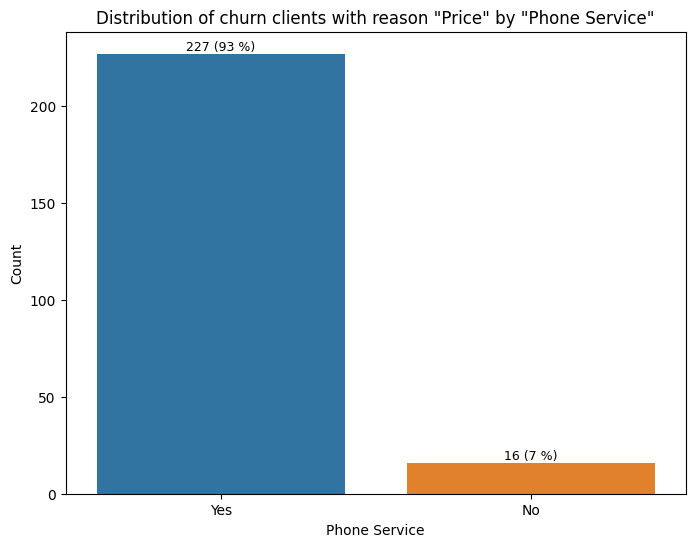

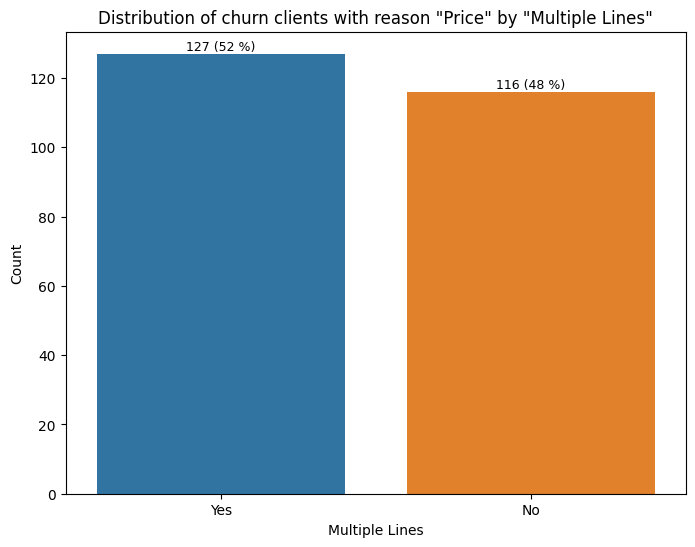

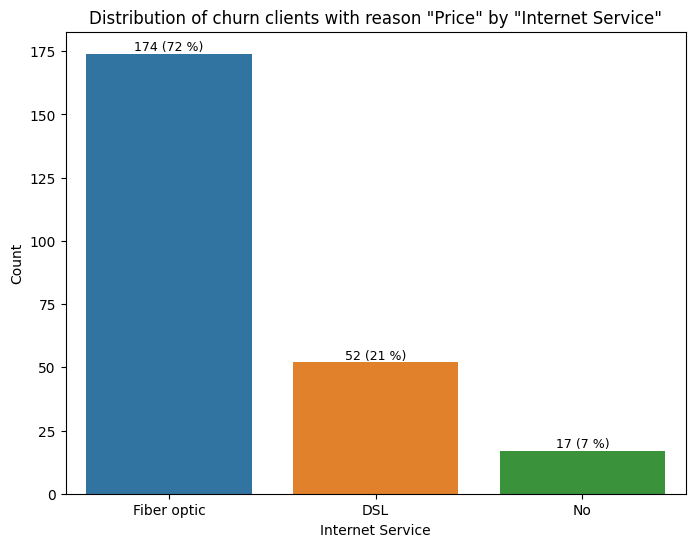

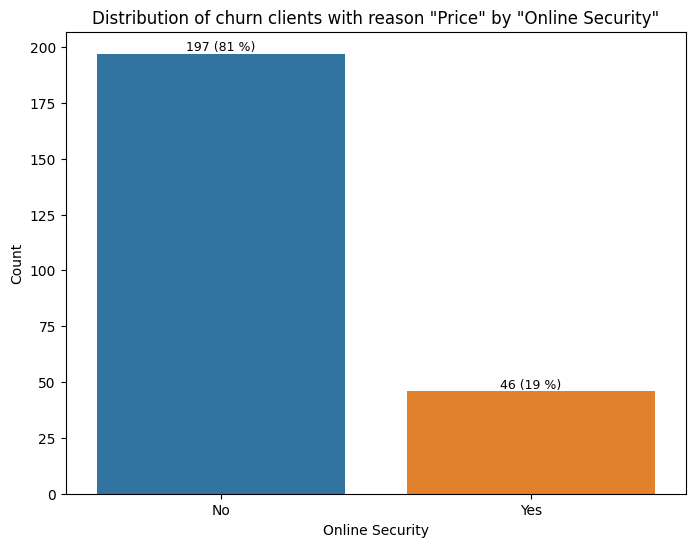

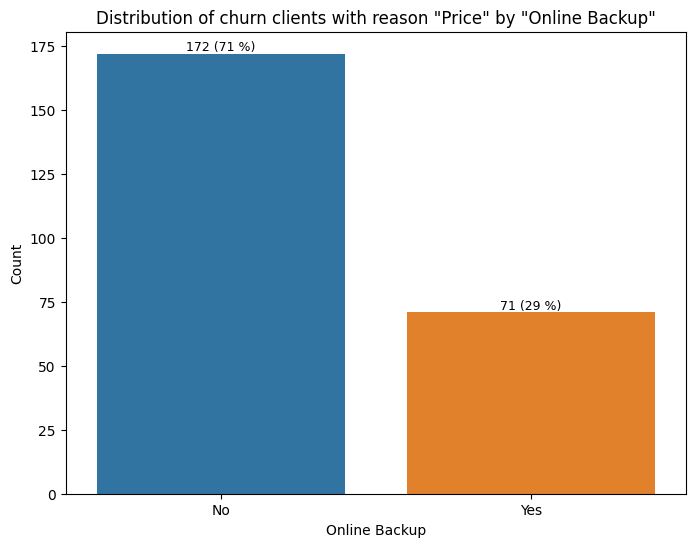

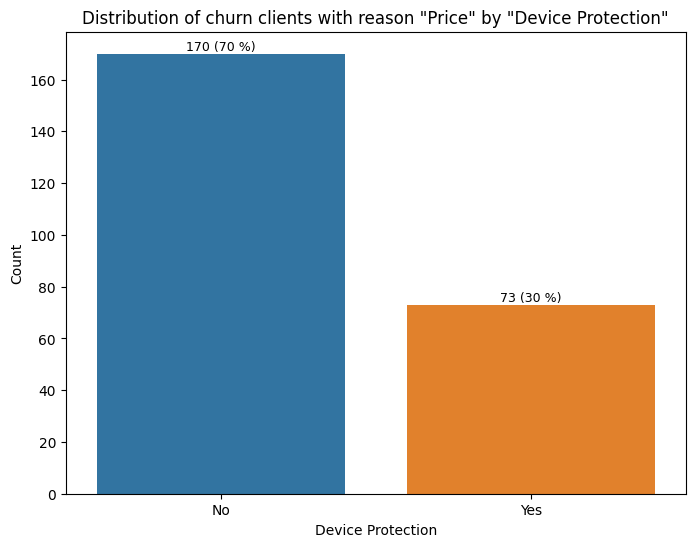

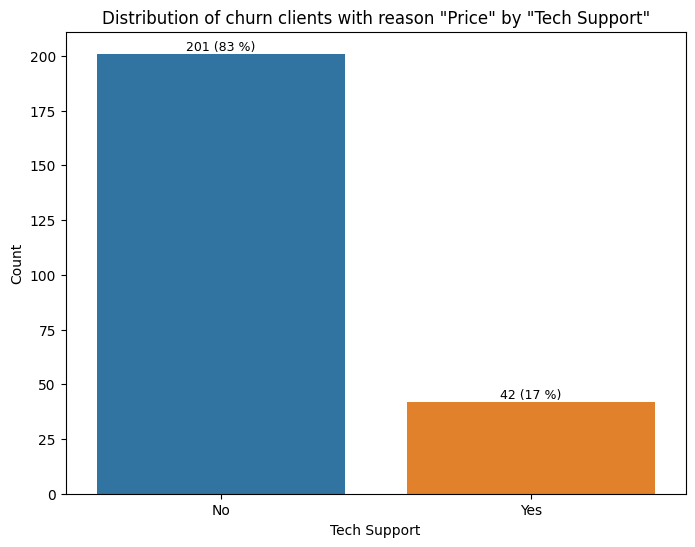

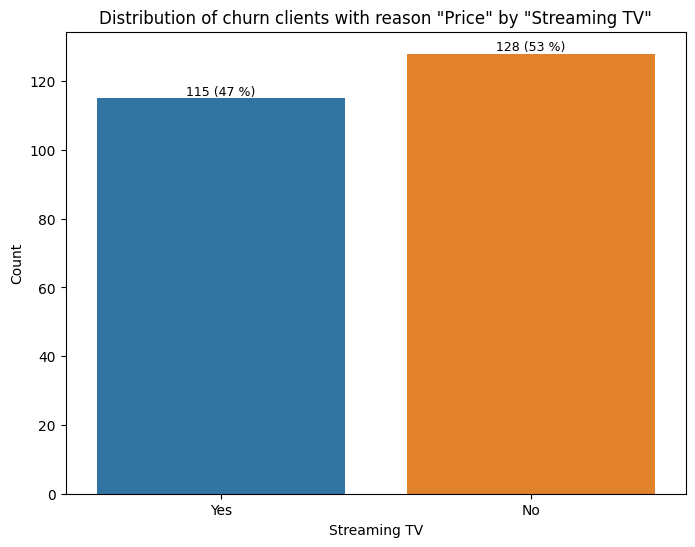

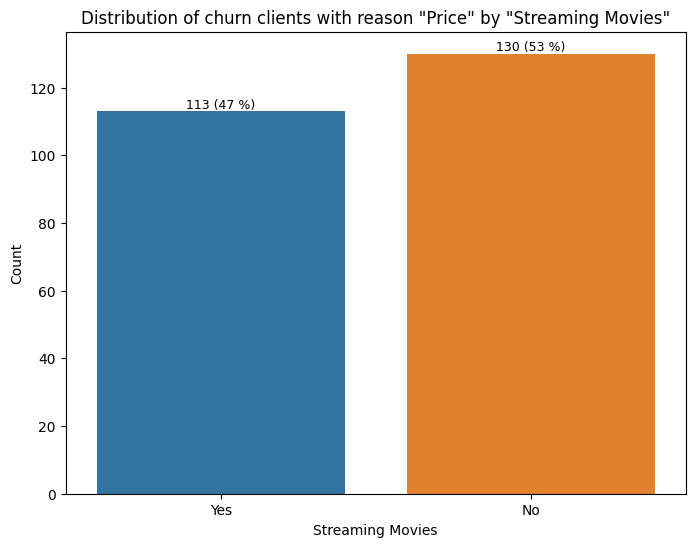

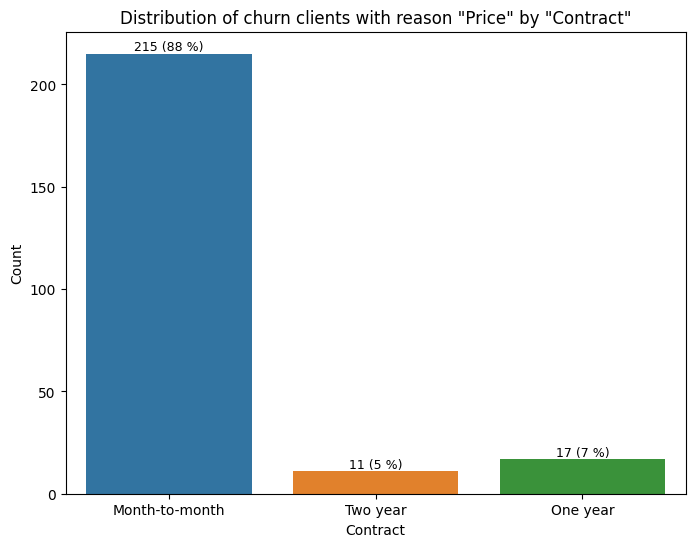

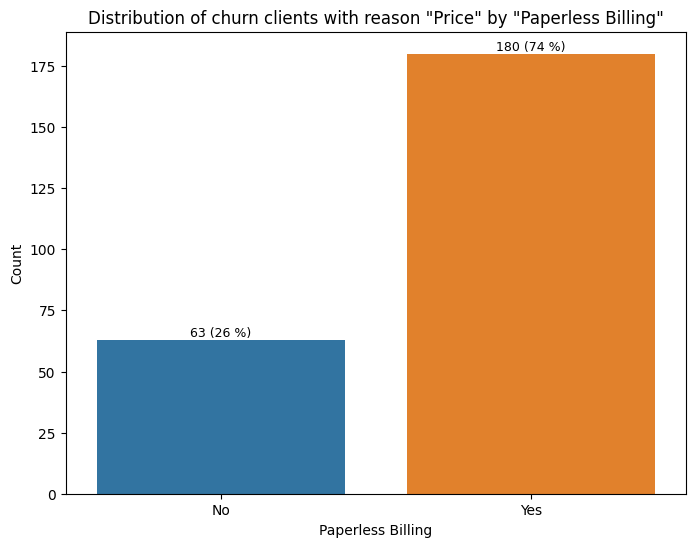

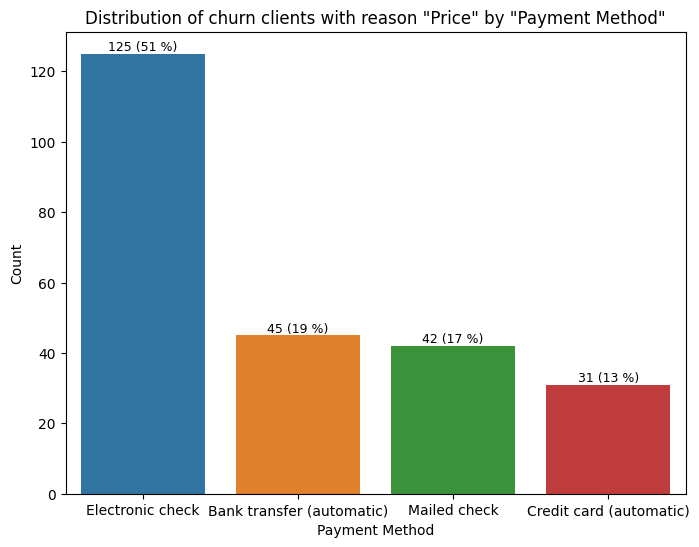

In [6]:
top_3 = churn_df[churn_df['Churn Value'] == 1 ].groupby(['Churn Reason'])['City'].count().sort_values(ascending=False)[:3].index

cols_cat = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

for reason in top_3 :
    for col in cols_cat :
        # Create figure and adjust size
        plt.figure(figsize=(8,6))

        # Create count plot
        ax = sns.countplot(churn_df[(churn_df['Churn Value'] == 1 ) & (churn_df['Churn Reason'] == reason)], x=col, hue=col)

        # Add title
        ax.set_title(f'Distribution of churn clients with reason "{reason}" by "{col}"')

        # Add axis labels
        ax.set_xlabel(col)
        ax.set_ylabel('Count')

        # Add column labels
        for index, artist in enumerate(ax.containers) :
            #print(artist.datavalues)
            labels = [f'{v:.0f} ({(v/len(churn_df[(churn_df['Churn Value'] == 1 ) & (churn_df['Churn Reason'] == reason)])) * 100:.0f} %)'  if v else '' for v in artist.datavalues]
            ax.bar_label(artist, labels=labels, fontsize = 9)

        # Show plot
        plt.show()

        

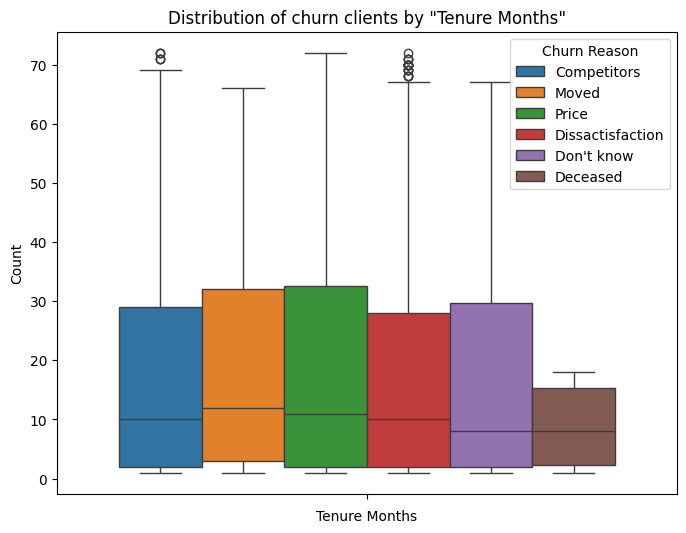

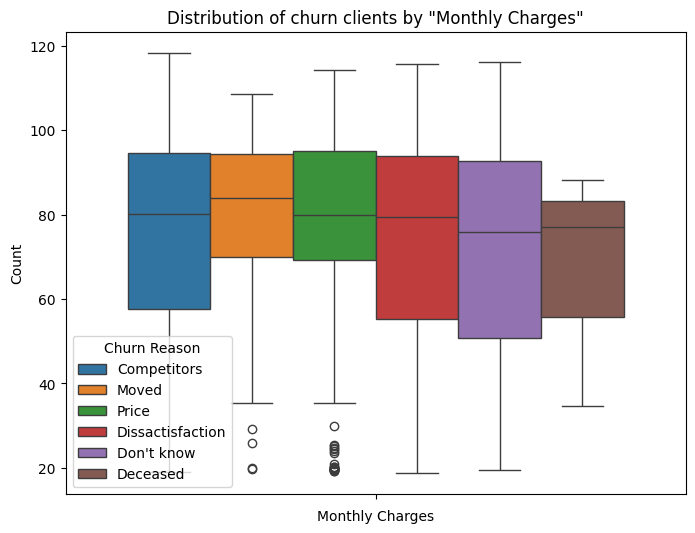

In [7]:
cols_cat = ['Tenure Months', 'Monthly Charges']

for col in cols_cat :
    # Create figure and adjust size
    plt.figure(figsize=(8,6))

    # Create count plot
    ax = sns.boxplot(churn_df[(churn_df['Churn Value'] == 1 )], y=col, hue='Churn Reason')

    # Add title
    ax.set_title(f'Distribution of churn clients by "{col}"')

    # Add axis labels
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Show plot
    plt.show()

        

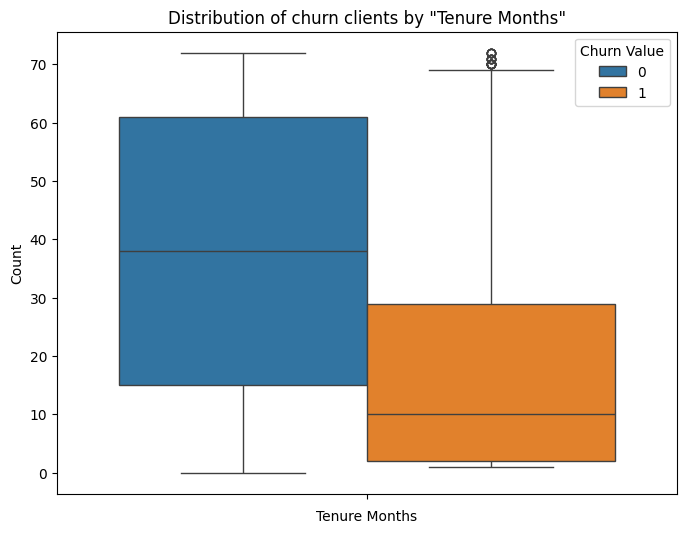

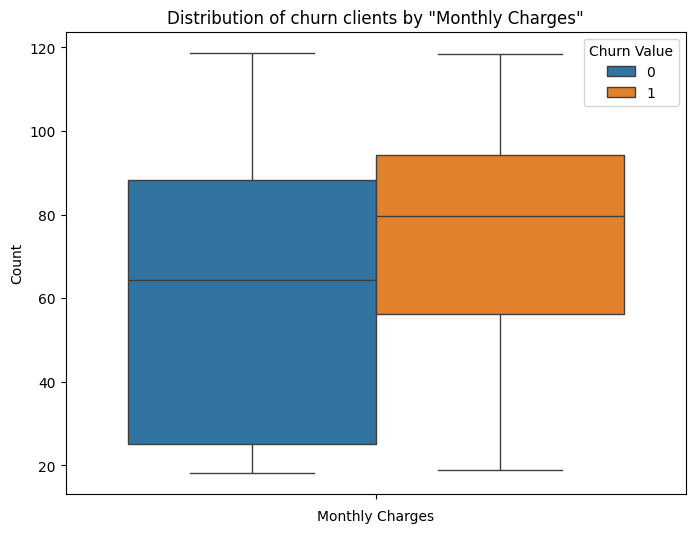

In [8]:
cols_cat = ['Tenure Months', 'Monthly Charges']

for col in cols_cat :
    # Create figure and adjust size
    plt.figure(figsize=(8,6))

    # Create count plot
    ax = sns.boxplot(churn_df, y=col, hue='Churn Value')

    # Add title
    ax.set_title(f'Distribution of churn clients by "{col}"')

    # Add axis labels
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Show plot
    plt.show()

        

### Investigate distribution of categorical columns in regards of the 'Churn Value'

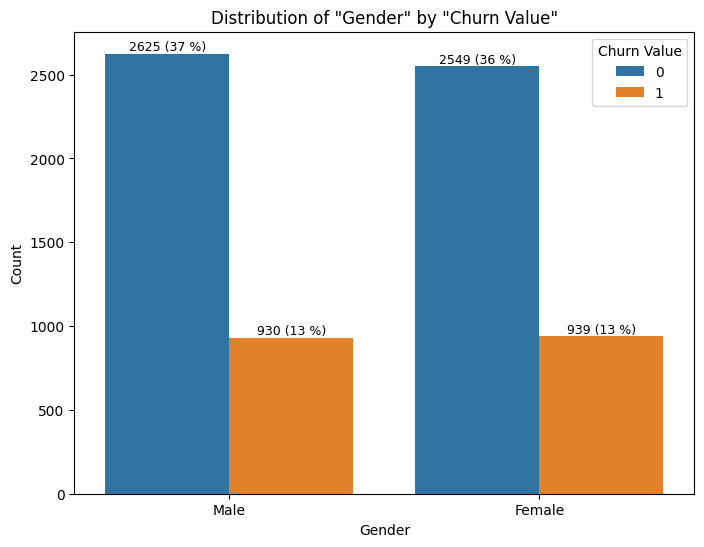

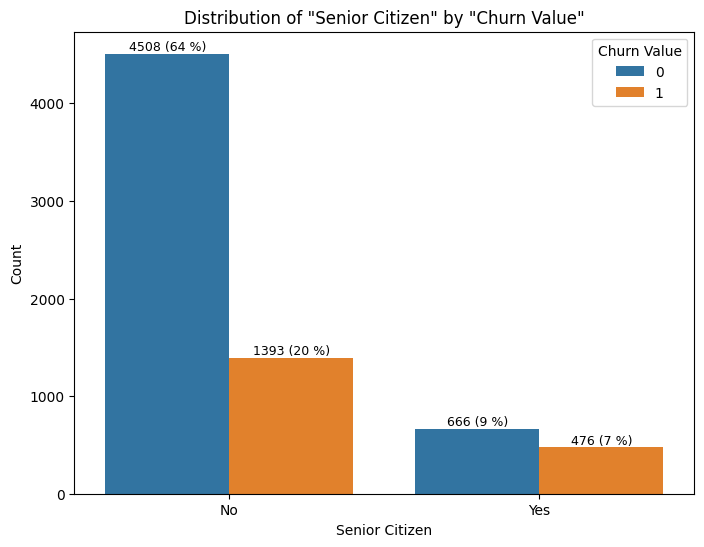

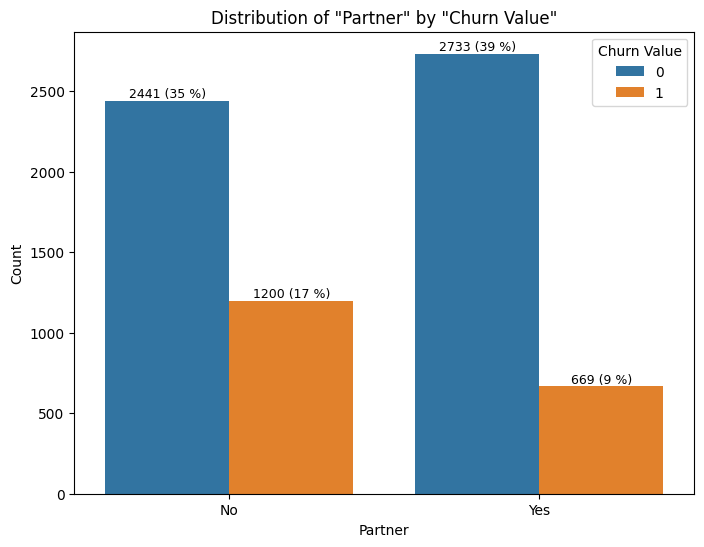

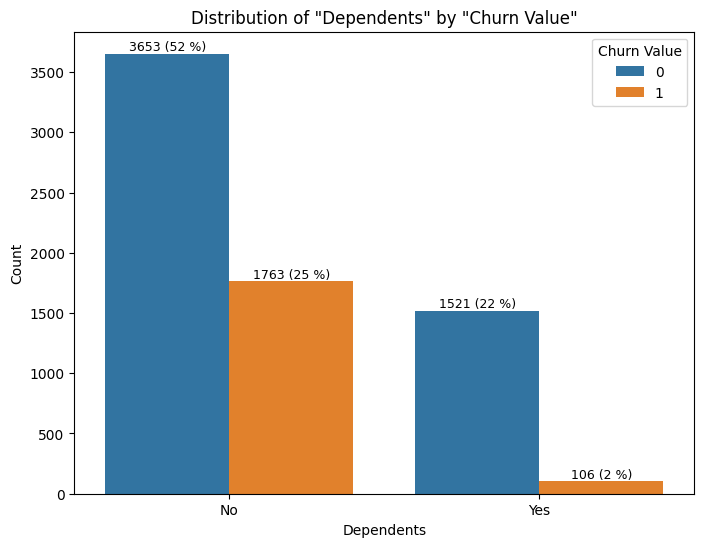

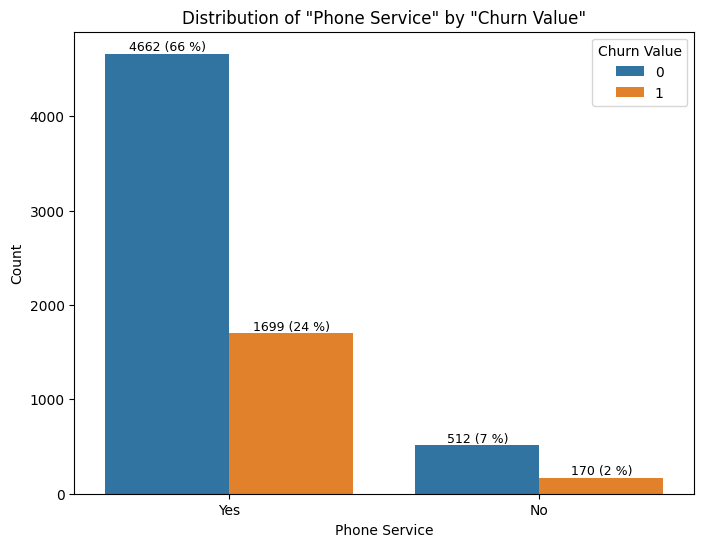

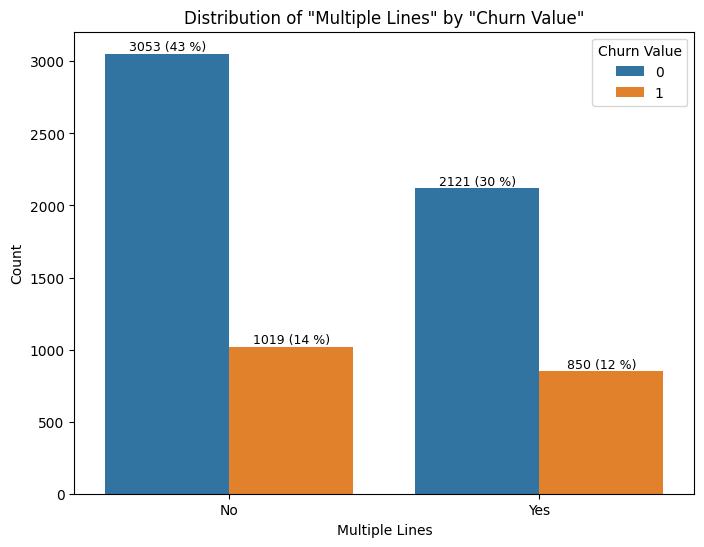

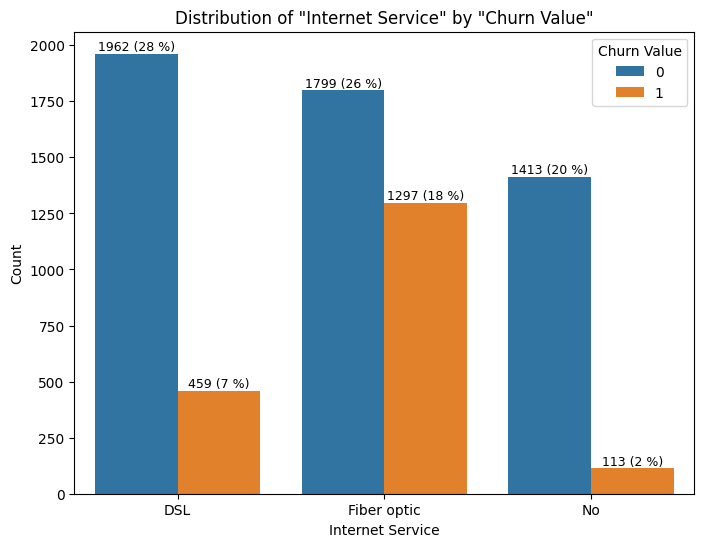

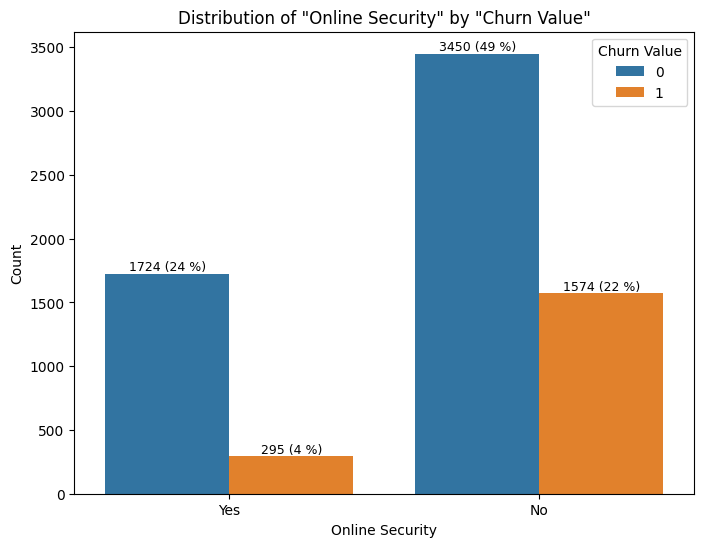

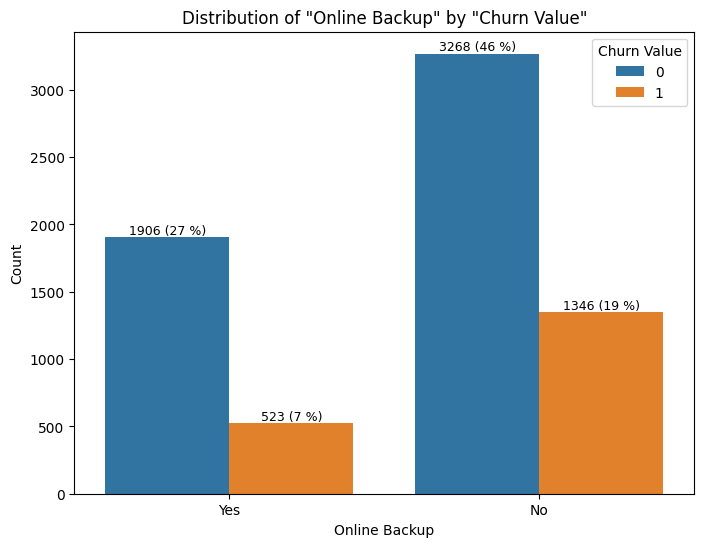

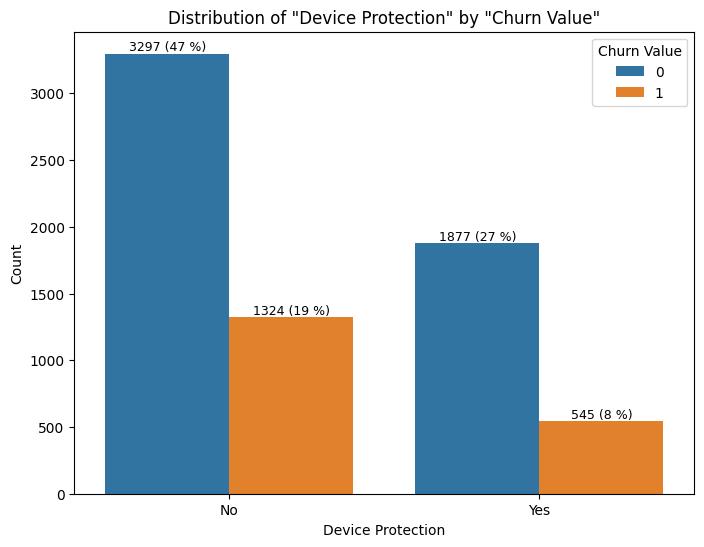

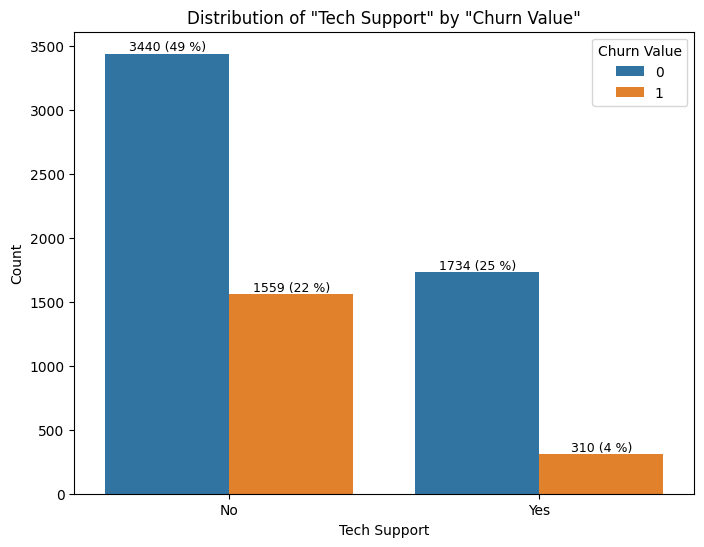

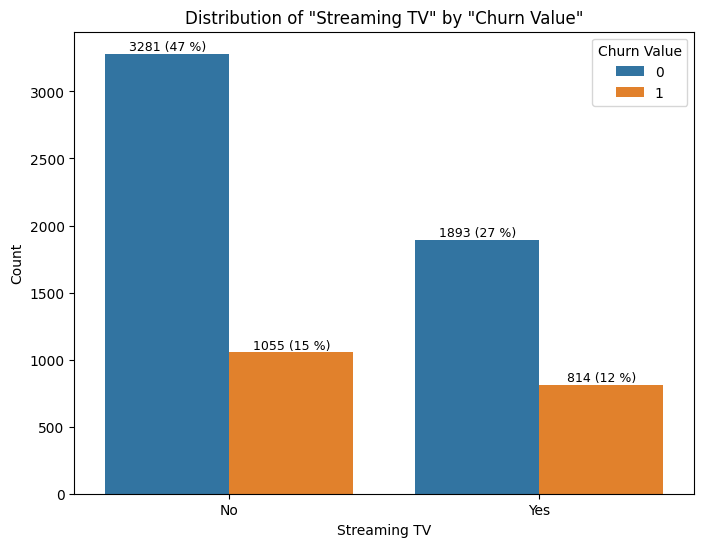

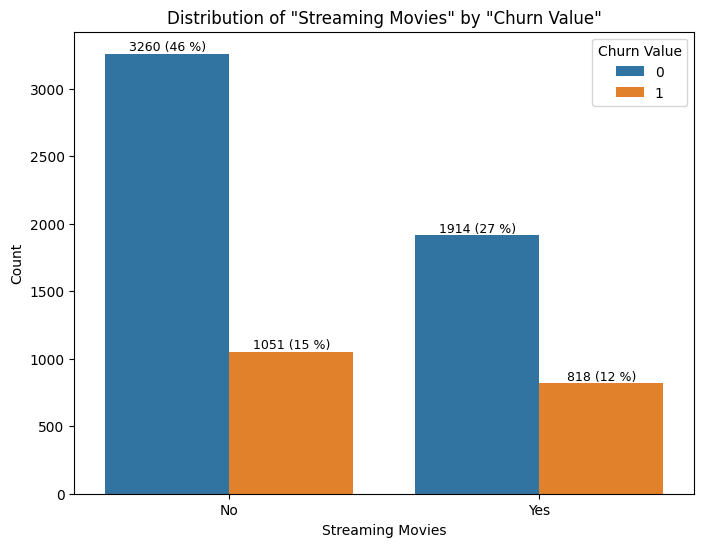

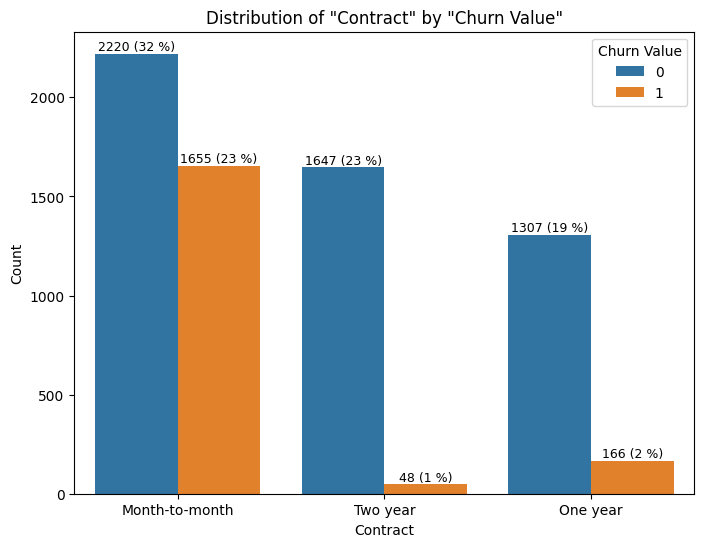

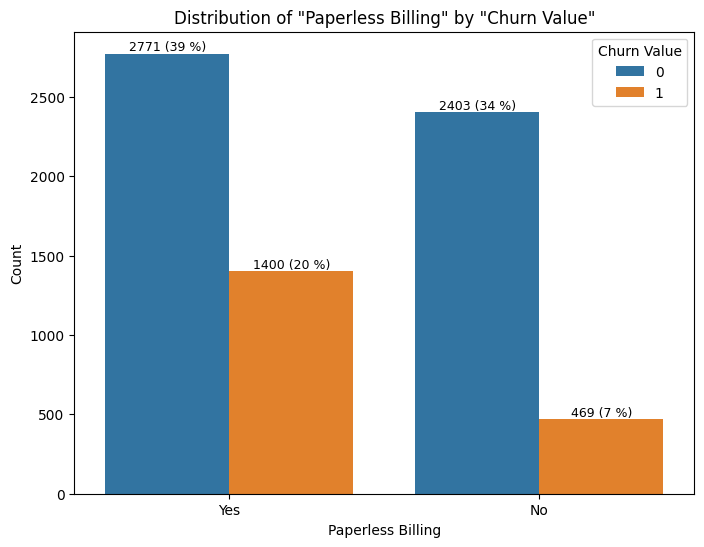

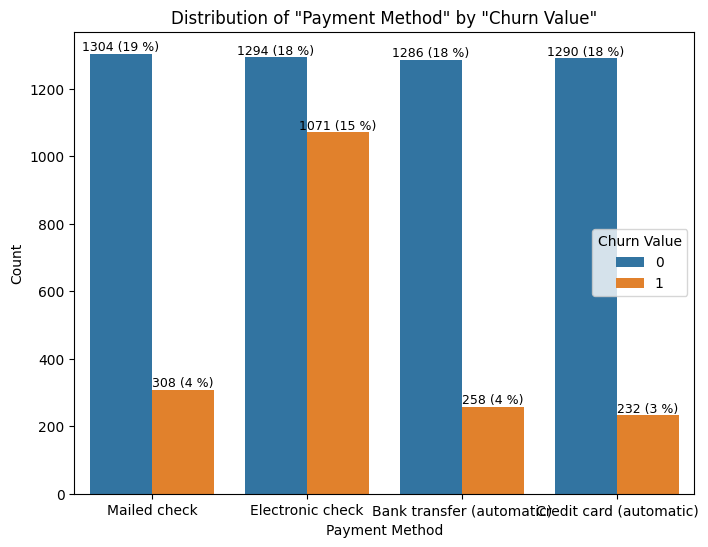

In [9]:
cols_cat = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

col_hue = 'Churn Value'

for col in cols_cat :
    # Create figure and adjust size
    plt.figure(figsize=(8,6))

    # Create count plot
    ax = sns.countplot(churn_df, x=col, hue=col_hue)

    # Add title
    ax.set_title(f'Distribution of "{col}" by "{col_hue}"')

    # Add axis labels
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Add column labels
    for index, artist in enumerate(ax.containers) :
        #print(artist.datavalues)
        labels = [f'{v:.0f} ({(v/len(churn_df)) * 100:.0f} %)'  if v else '' for v in artist.datavalues]
        ax.bar_label(artist, labels=labels, fontsize = 9)

    # Show plot
    plt.show()
    

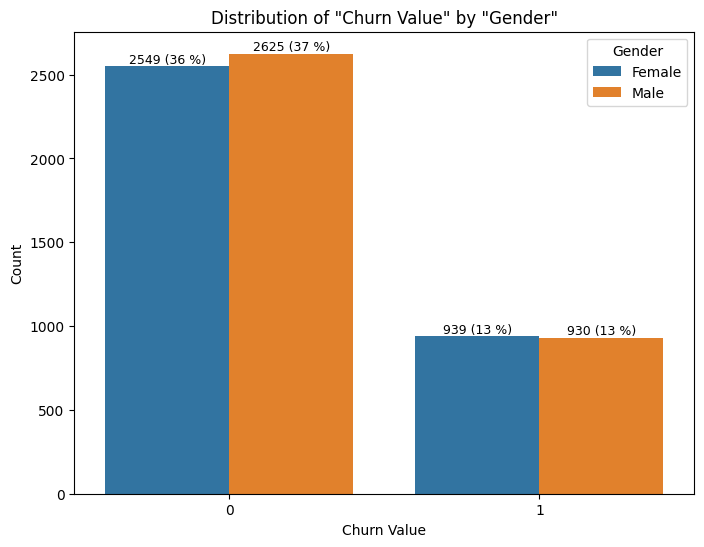

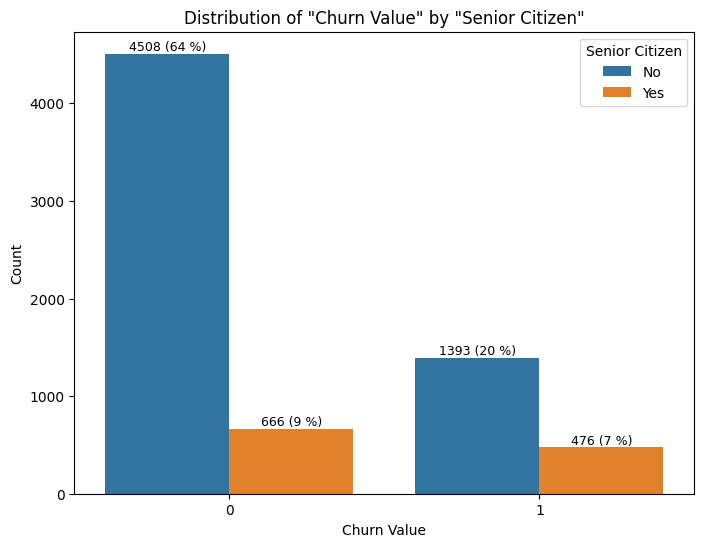

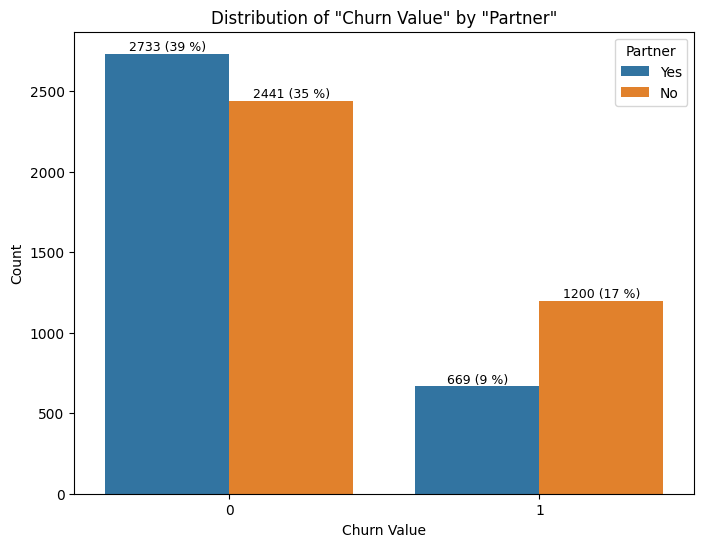

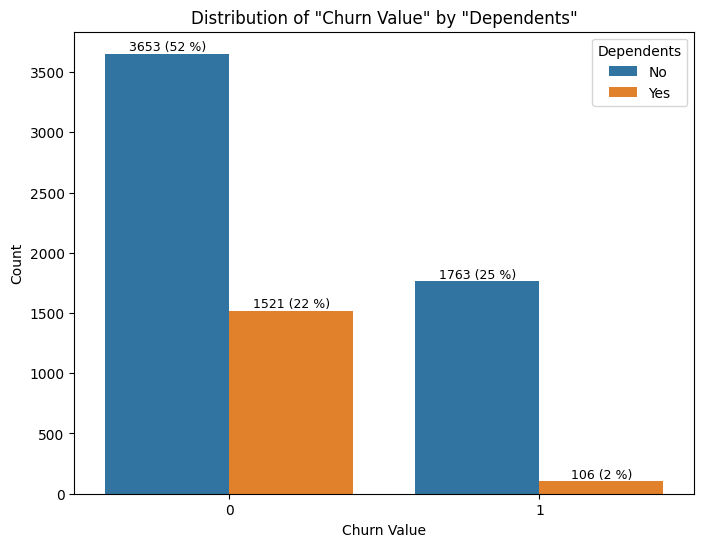

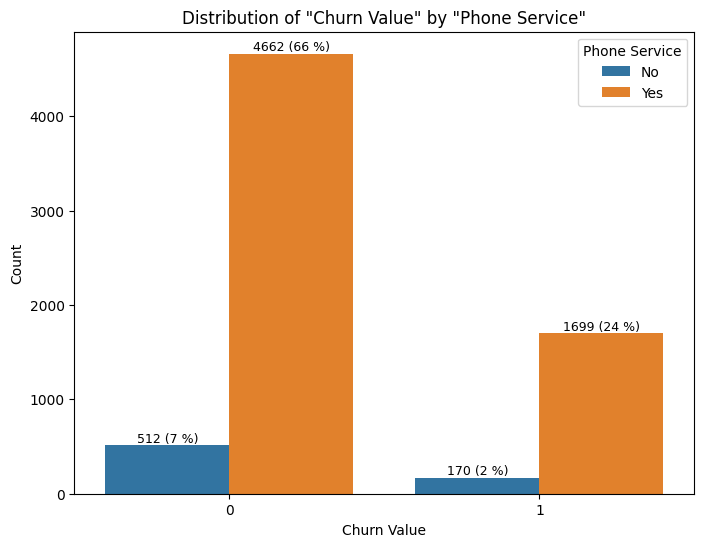

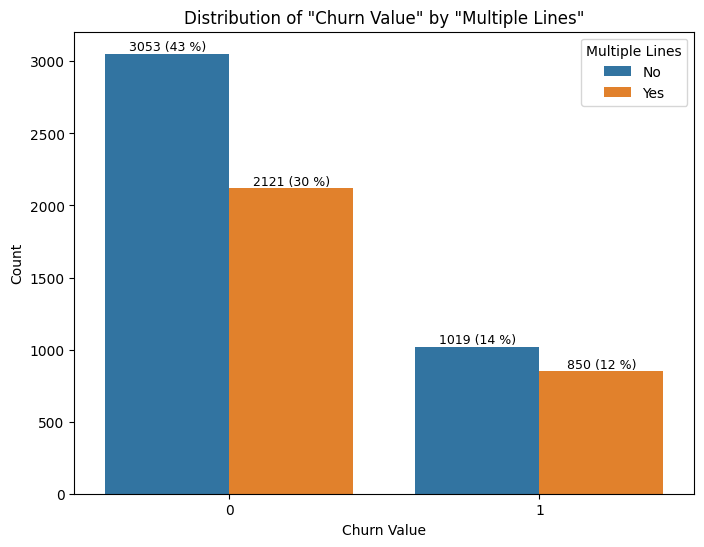

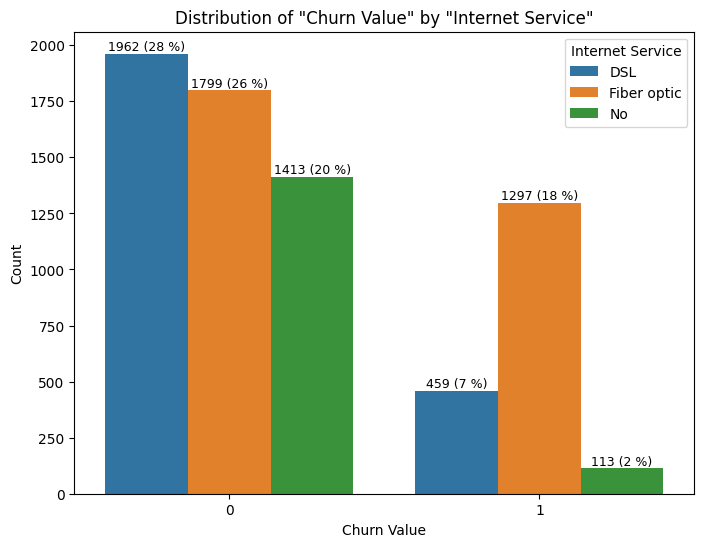

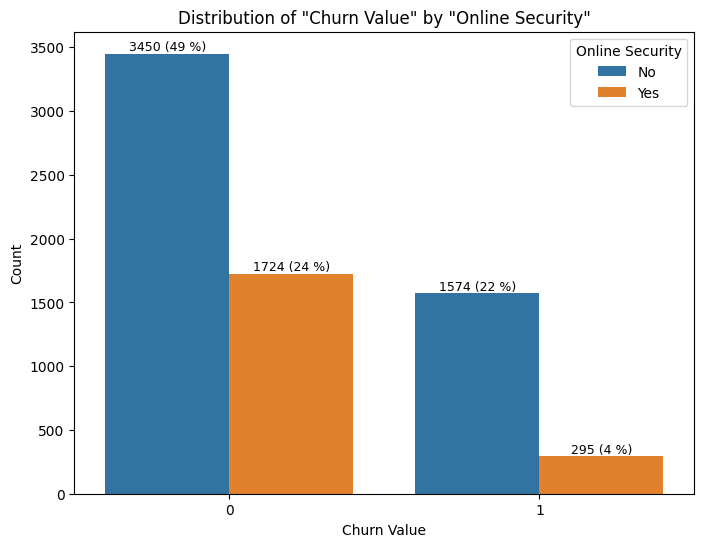

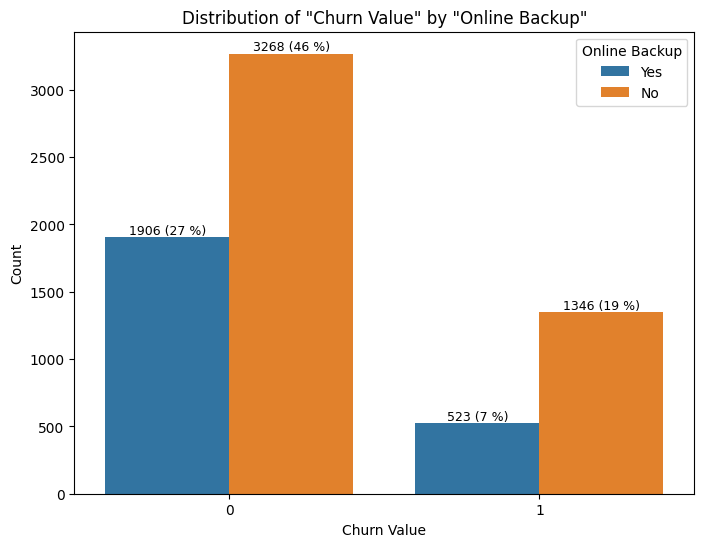

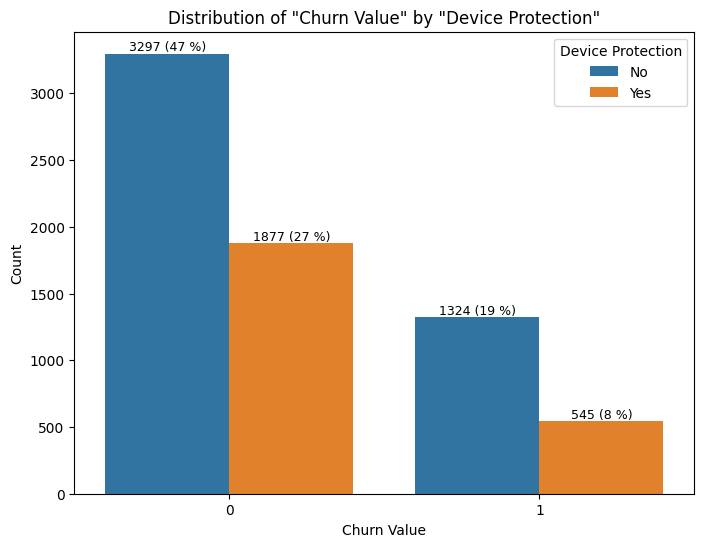

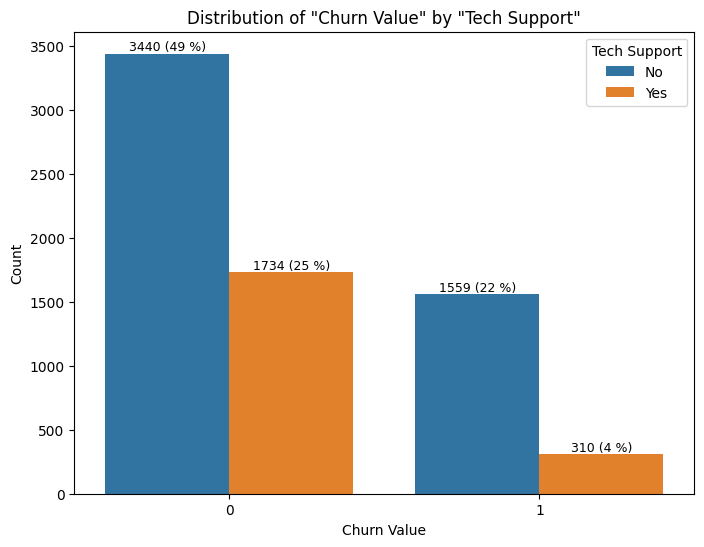

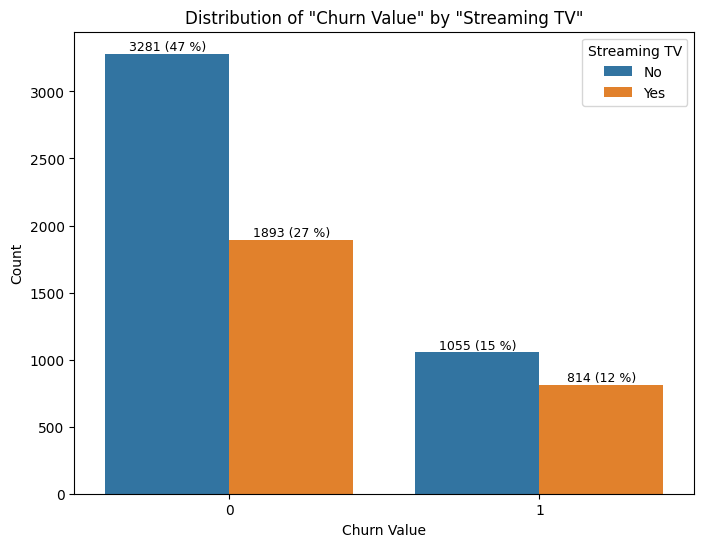

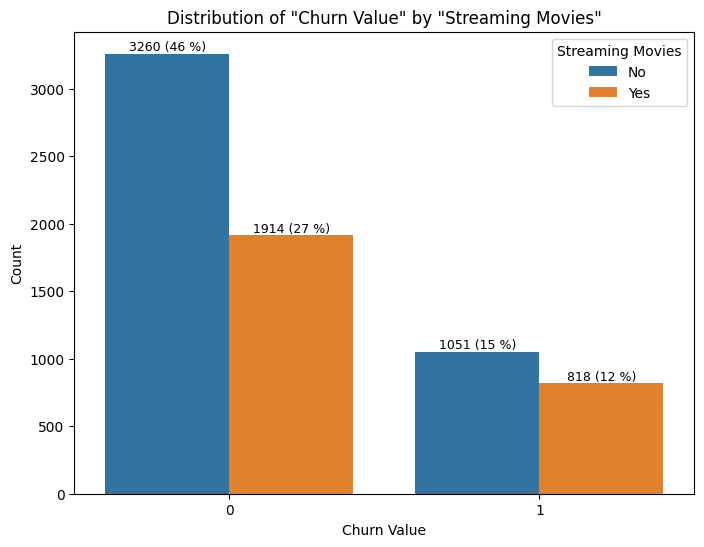

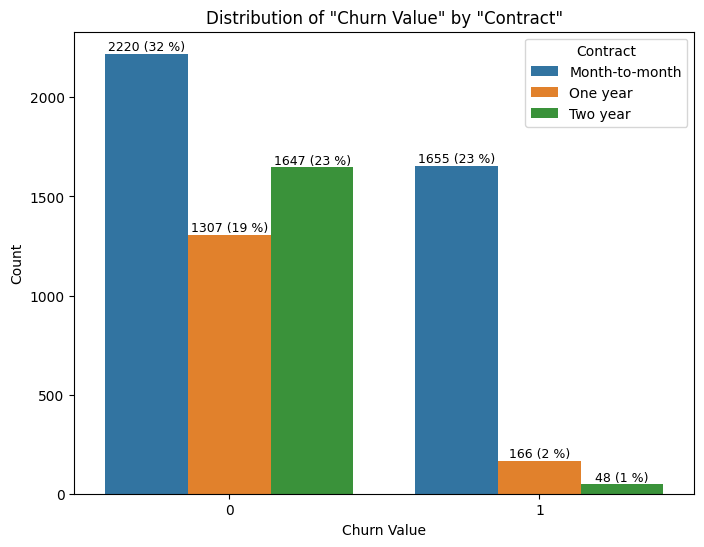

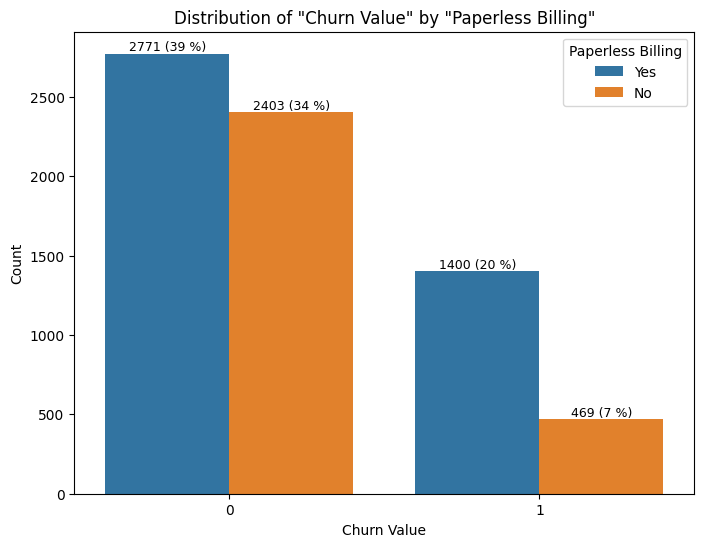

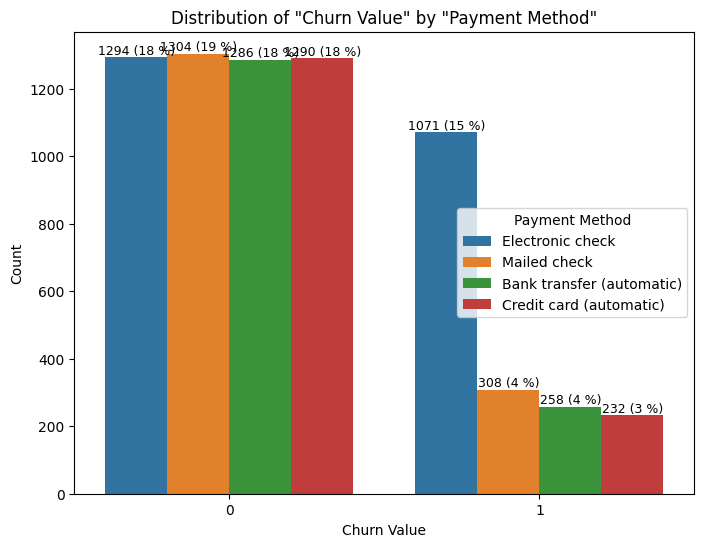

In [10]:
cols_cat = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

col_hue = 'Churn Value'

for col in cols_cat :
    # Create figure and adjust size
    plt.figure(figsize=(8,6))

    # Create count plot
    ax = sns.countplot(churn_df, x=col_hue, hue=col)

    # Add title
    ax.set_title(f'Distribution of "{col_hue}" by "{col}"')

    # Add axis labels
    ax.set_xlabel(col_hue)
    ax.set_ylabel('Count')

    # Add column labels
    for index, artist in enumerate(ax.containers) :
        #print(artist.datavalues)
        labels = [f'{v:.0f} ({(v/len(churn_df)) * 100:.0f} %)'  if v else '' for v in artist.datavalues]
        ax.bar_label(artist, labels=labels, fontsize = 9)

    # Show plot
    plt.show()
    